In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [ ]:
#mount directory
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#load data entries
fileNameFullPath = "/content/drive/MyDrive/ML/heart.csv"
df = pd.read_csv(fileNameFullPath)

In [ ]:
#Checks if there are NaN values
nan_report = df.isna().sum()

nan_per_report = (df.isna().mean() * 100).round(2)

combined_report = pd.concat([nan_report, nan_per_report], axis=1, keys=['NaN Count', 'NaN Percentage'])

print("Combined NaN Report:")
print(combined_report)

if combined_report.values.max()  == 0:
  print("\nGood news! There are no missing values.")
else:
  print("\nThere are missing values. You should hand them appropriately.")

Combined NaN Report:
                NaN Count  NaN Percentage
Age                     0             0.0
Sex                     0             0.0
ChestPainType           0             0.0
RestingBP               0             0.0
Cholesterol             0             0.0
FastingBS               0             0.0
RestingECG              0             0.0
MaxHR                   0             0.0
ExerciseAngina          0             0.0
Oldpeak                 0             0.0
ST_Slope                0             0.0
HeartDisease            0             0.0

Good news! There are no missing values.


In [ ]:
column_titles = df.columns
print(column_titles)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


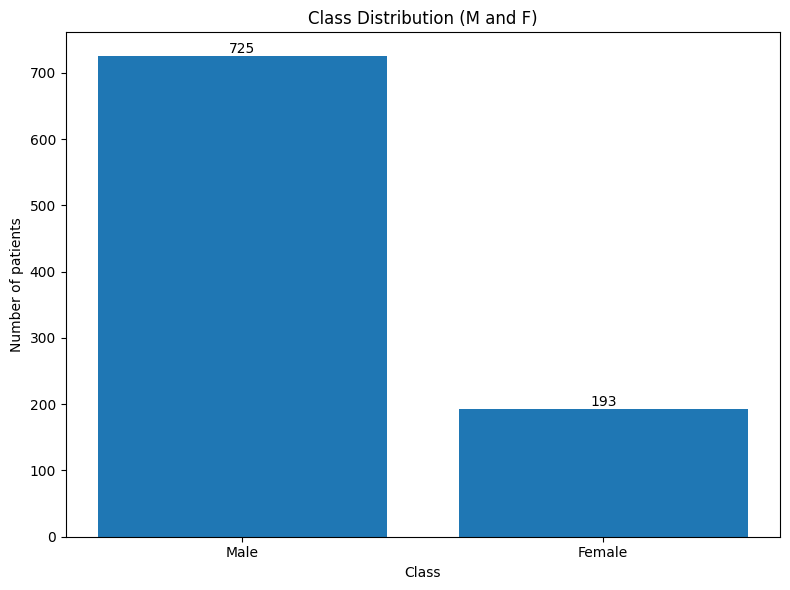

In [ ]:
#plot for class distribution

#second column is M for male and F for female
class_col = column_titles[1]

class_labels = {'M' : 'Male', 'F' : 'Female'}


#Count people based on their gender
class_counts = df[class_col].map(class_labels.get).value_counts()



plt.figure(figsize=(8,6))

plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])

for bar in plt.bar(class_counts.index, class_counts.values):
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Number of patients')
plt.title('Class Distribution (M and F)')
plt.xticks(rotation=0) #optional: rotate x-axis

'''
if class_labels:
  plt.xticks(ticks=class_counts.index, labels=class_labels.values())
'''

plt.tight_layout()
plt.show()


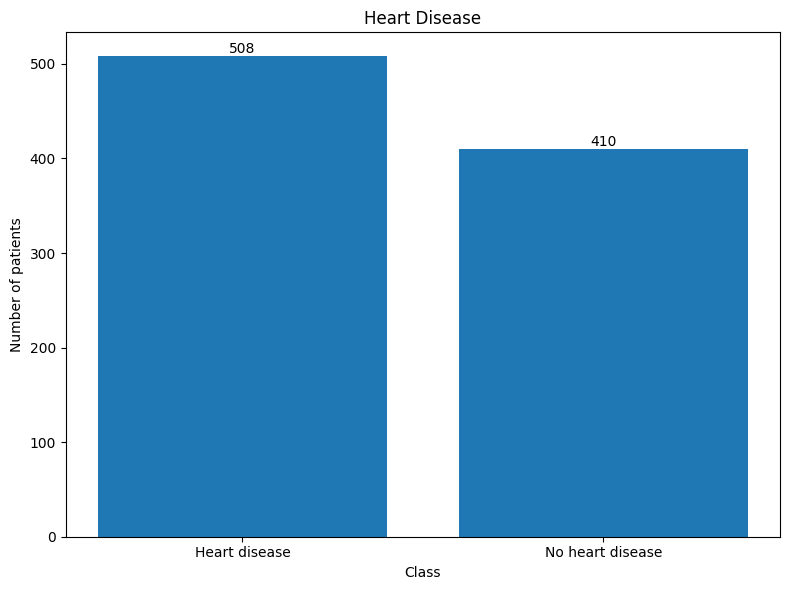

In [ ]:
#Count people based on whether they have a heart disease or not
dis_col = column_titles[11]

class_labels = {0 : 'No heart disease', 1 : 'Heart disease'}


dis_counts = df[dis_col].map(class_labels.get).value_counts()


plt.figure(figsize=(8,6))

plt.bar(dis_counts.index, dis_counts.values, color=['blue', 'red'])

for bar in plt.bar(dis_counts.index, dis_counts.values):
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Number of patients')
plt.title('Heart Disease')
plt.xticks(rotation=0) #optional: rotate x-axis

'''
if class_labels:
  plt.xticks(ticks=class_counts.index, labels=class_labels.values())
'''

plt.tight_layout()
plt.show()

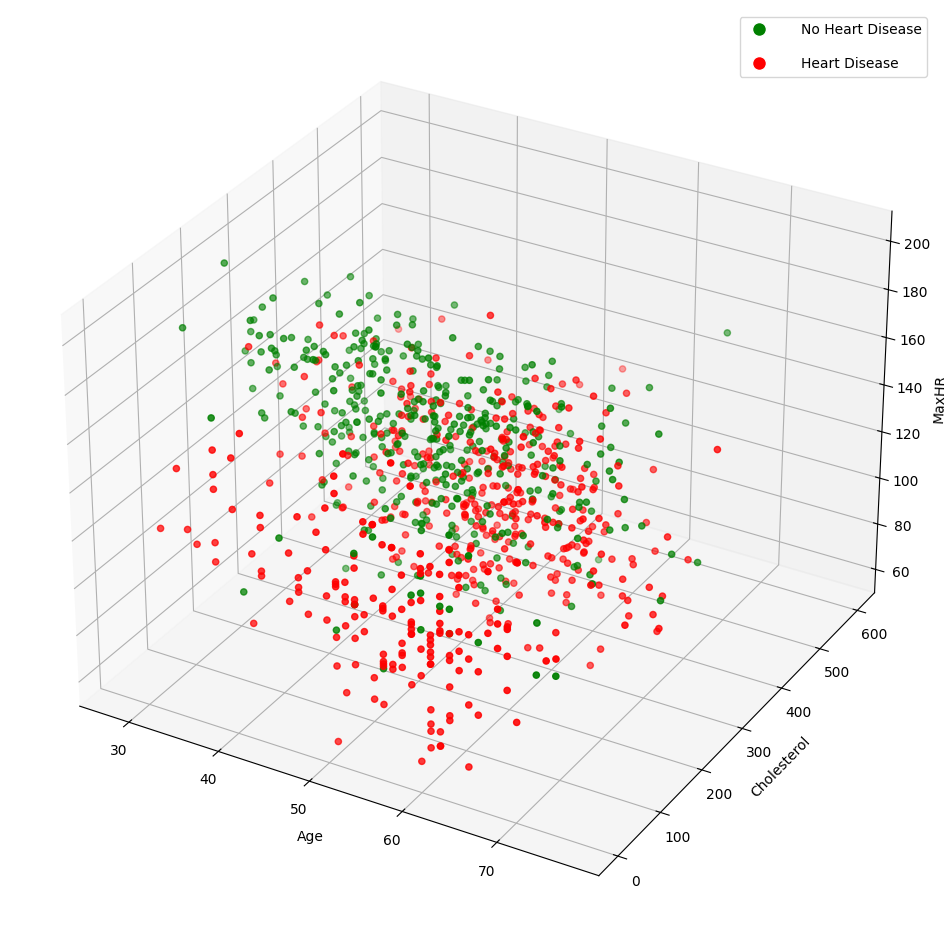

In [ ]:
# Create a 3D scatter plot for Age, Cholesterol and MaxHR
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Create a list of colors based on the values in the specified column
colors = np.where(df[column_titles[11]] == 0, 'green', 'red')

# Scatter plot with specified colors
ax.scatter(df[column_titles[0]], df[column_titles[4]], df[column_titles[7]], c=colors, marker='o')

# Set labels
ax.set_xlabel(column_titles[0])
ax.set_ylabel(column_titles[4])
ax.set_zlabel(column_titles[7])

# Add a legend
# Create custom legend handles
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='No Heart Disease'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Heart Disease')
]

# Add the legend to the plot
ax.legend(handles=legend_elements, handletextpad=2, labelspacing=1.5, loc='upper right')

# Show plot
plt.show()

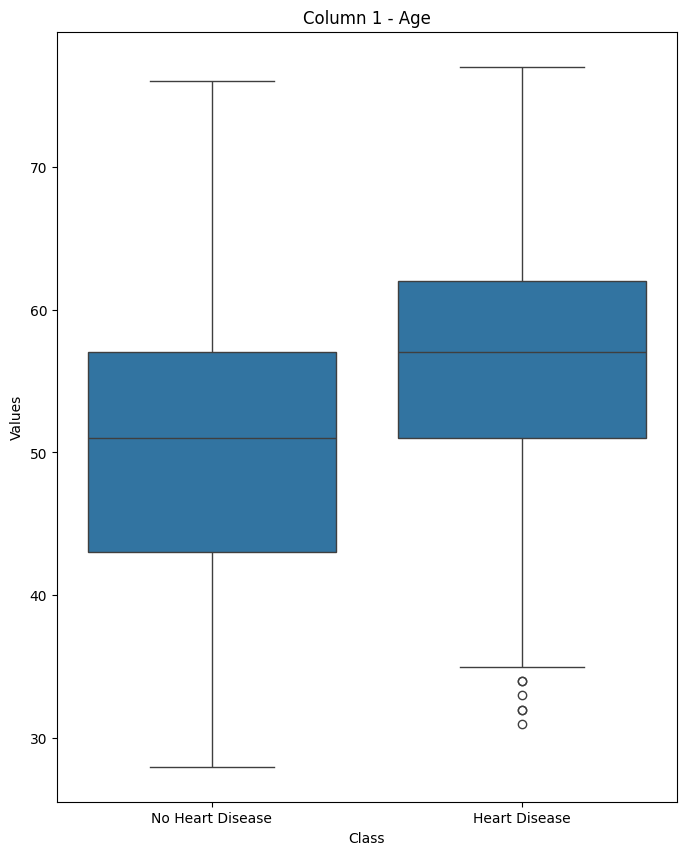

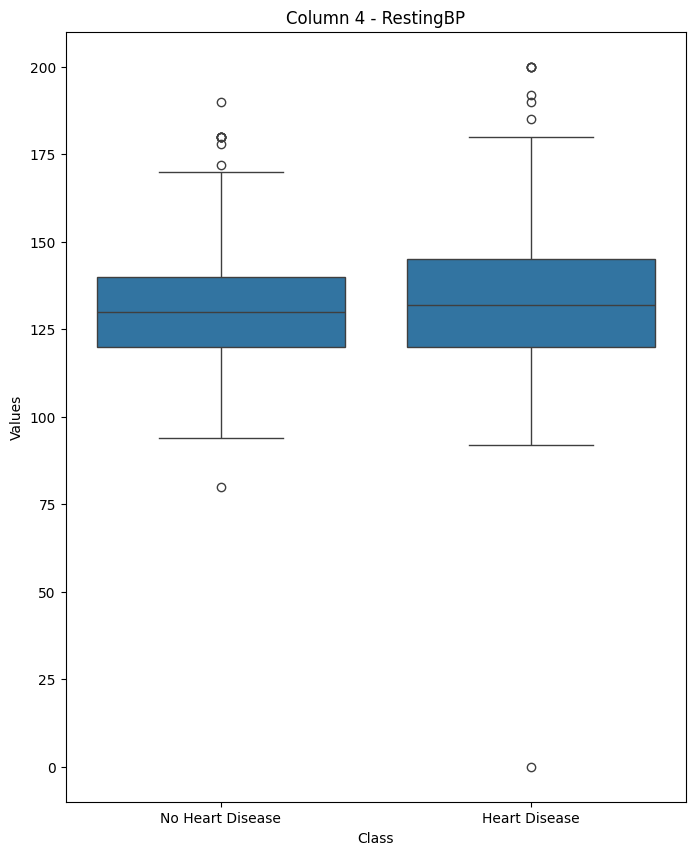

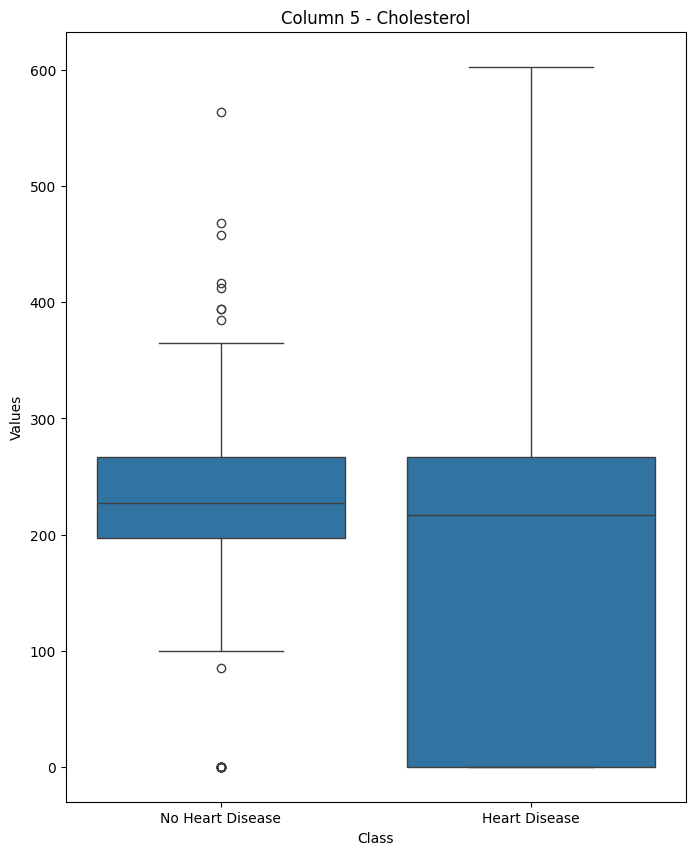

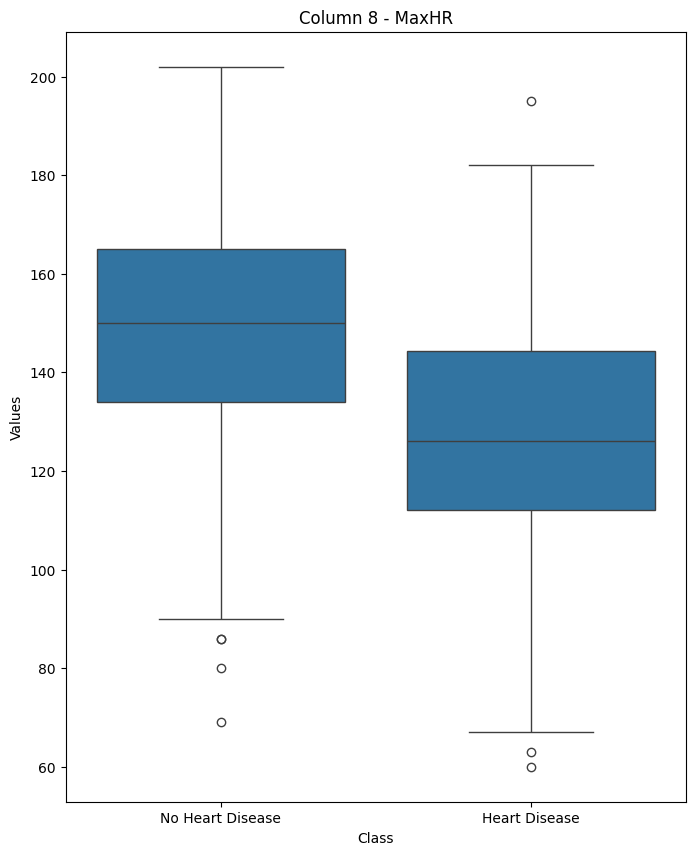

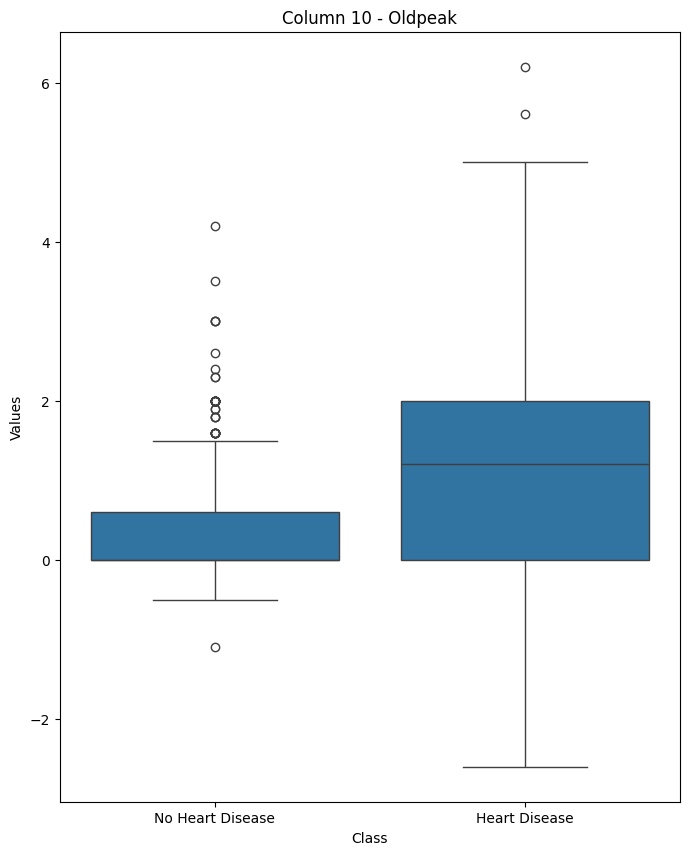

In [ ]:
#boxplots for some features (based on heart disease)
idxs = [0,3,4,7,9]

for col_idx in idxs:
    if col_idx != 1:
      plt.figure(figsize=(8,10))

      sns.boxplot(x=column_titles[11], y=df.columns[col_idx], data=df)

      plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])

      plt.title(f"Column {col_idx + 1} - {column_titles[col_idx]}")
      plt.xlabel('Class')
      plt.ylabel('Values')


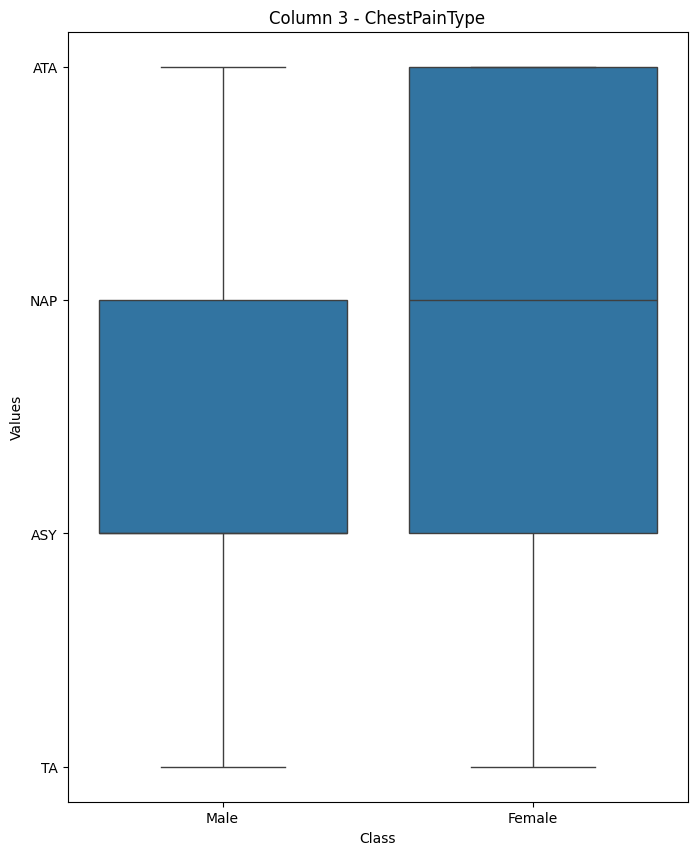

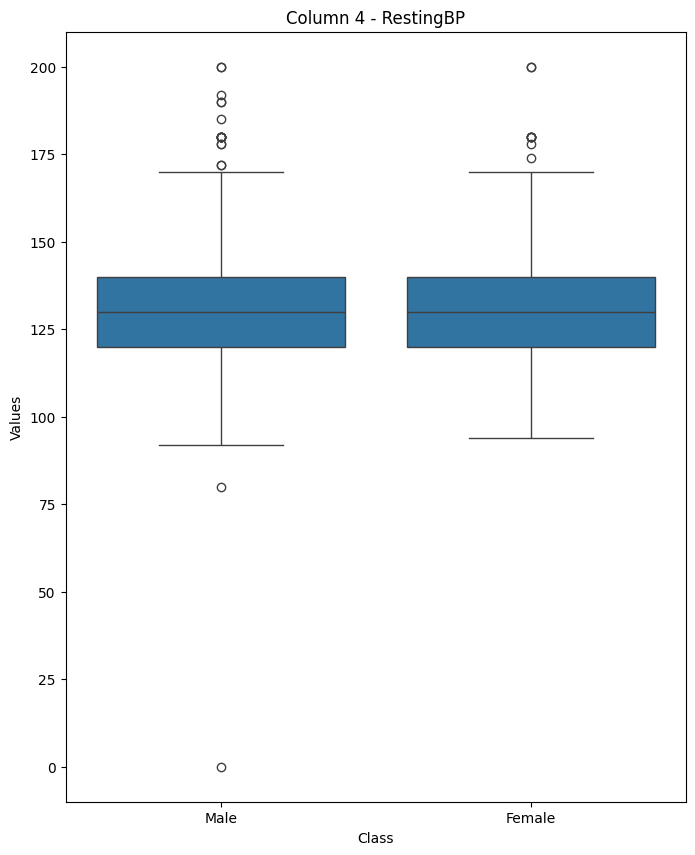

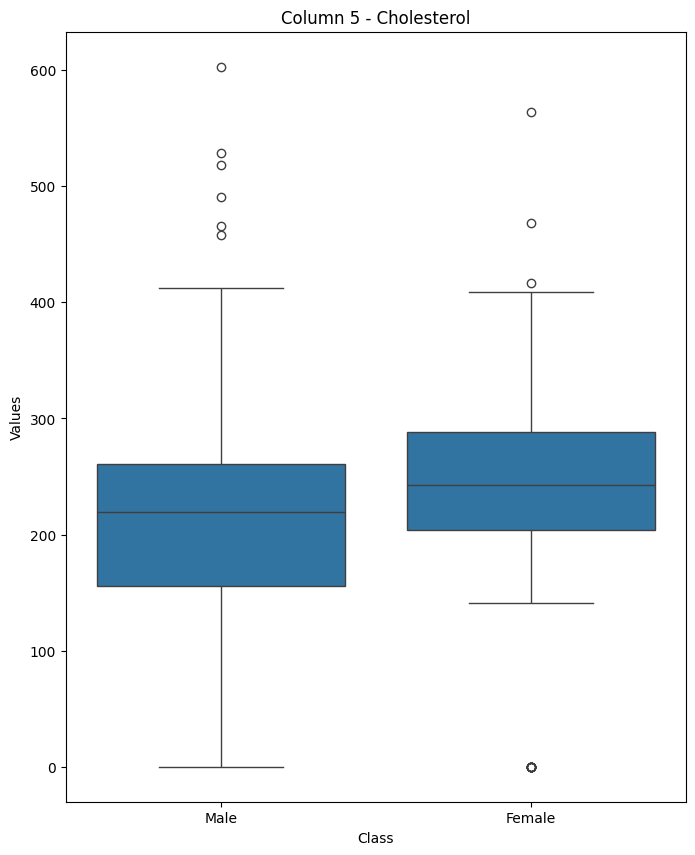

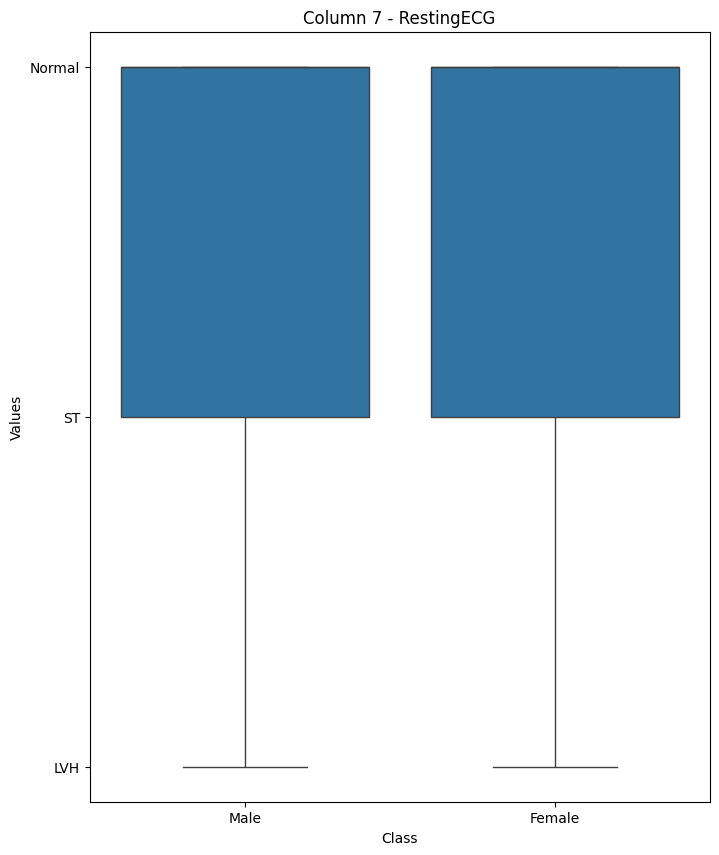

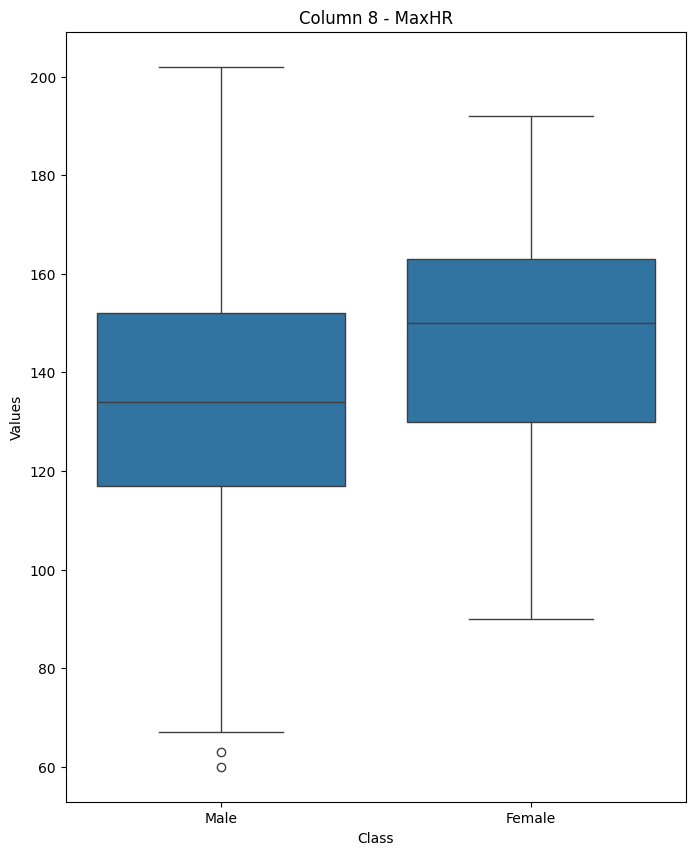

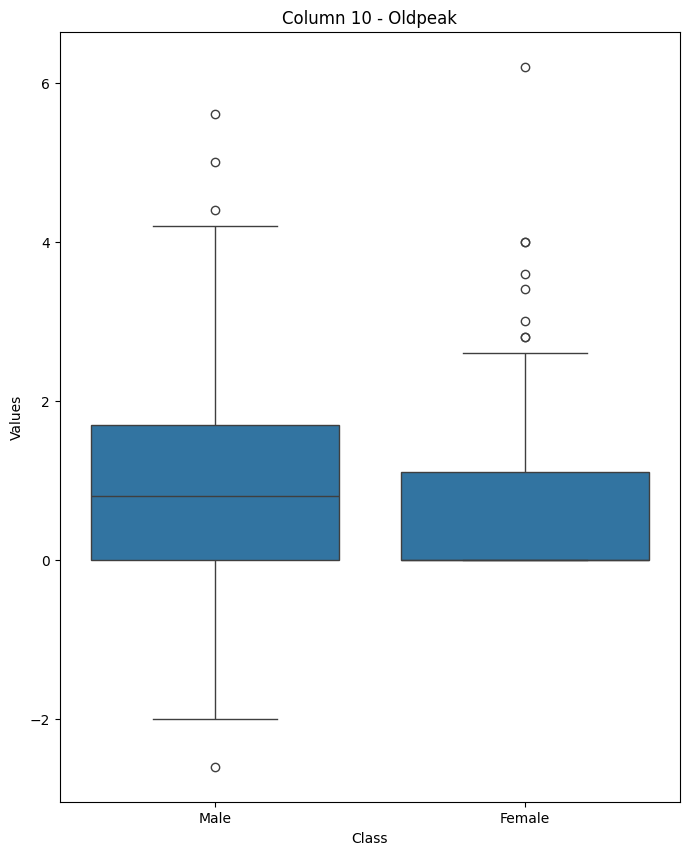

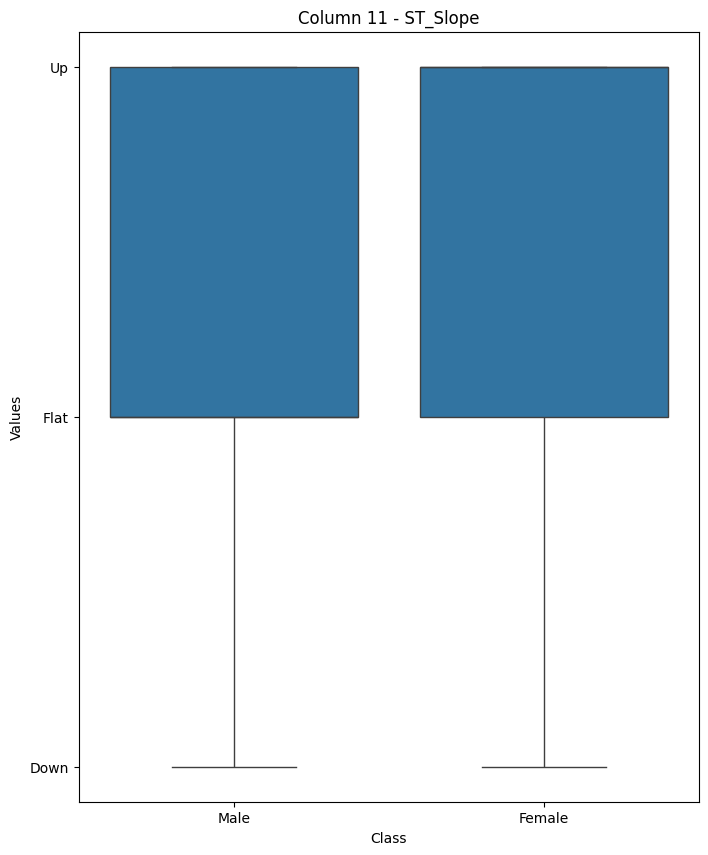

In [ ]:
#boxplots for some features (based on gender)
cols = [2,3,4,6,7,9,10]

for col_idx in cols:
  plt.figure(figsize=(8,10))

  #Create a box plot using SEABORN
  sns.boxplot(x=column_titles[1], y=df.columns[col_idx], data=df)

  plt.title(f"Column {col_idx + 1} - {column_titles[col_idx]}")
  plt.xlabel('Class')
  plt.ylabel('Values')

  plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

  plt.show()


In [ ]:
#Label Encoding for non-numeric columns
df['Sex'], _ = pd.factorize(df['Sex'])
df['ChestPainType'], _ = pd.factorize(df['ChestPainType'])
df['RestingECG'], _ = pd.factorize(df['RestingECG'])
df['ExerciseAngina'], _ = pd.factorize(df['ExerciseAngina'])
df['ST_Slope'], _ = pd.factorize(df['ST_Slope'])

inputData = df.iloc[:, 0:11].values

#convert_class = lambda x: 0 if x == 'M' else 1

outputData = df[column_titles[11]] #.apply(convert_class).values


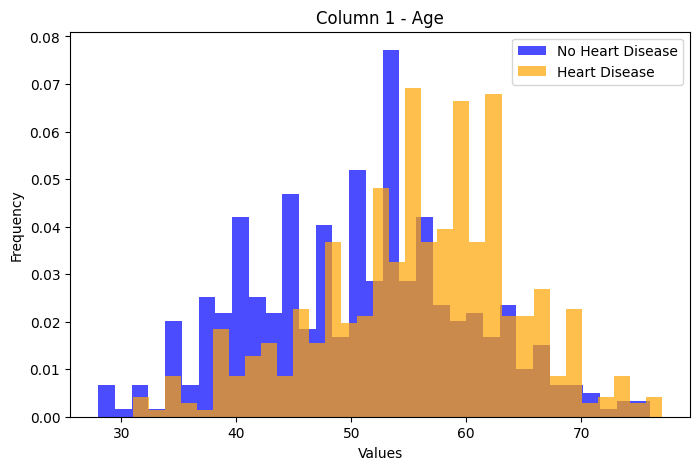

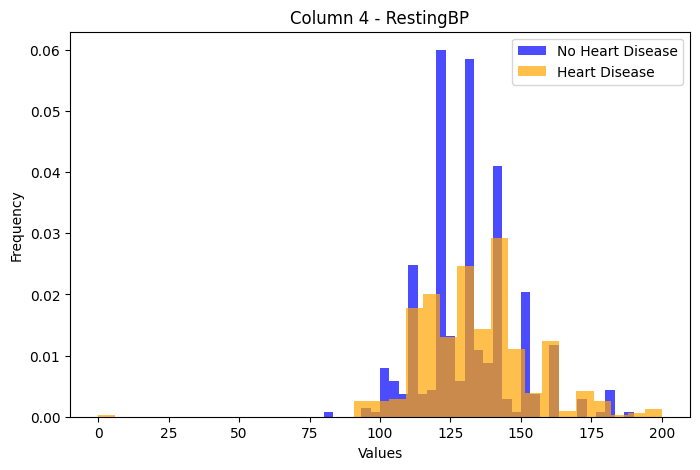

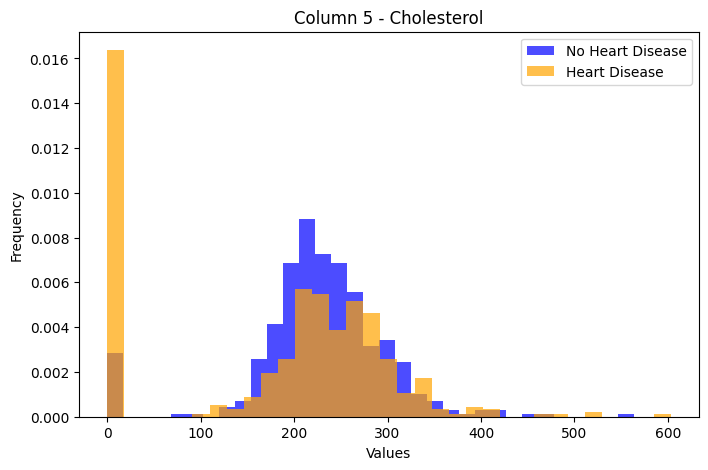

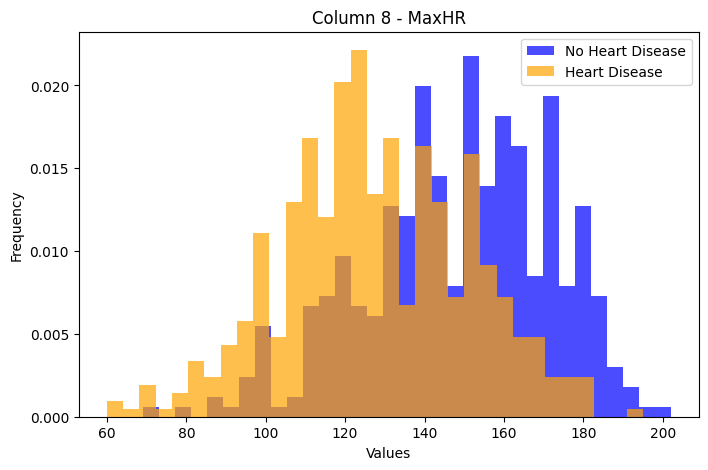

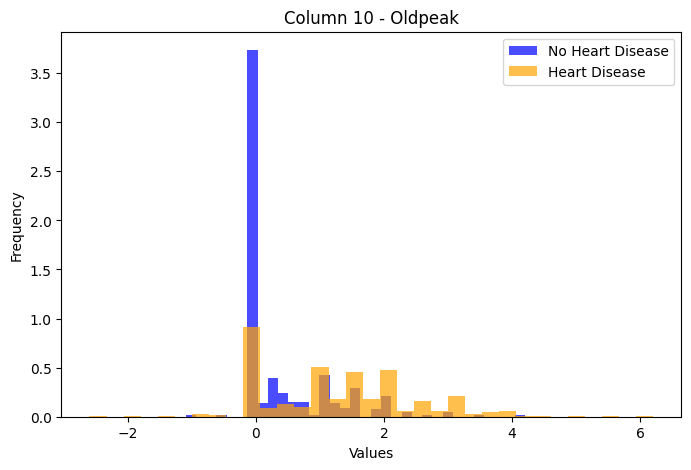

In [ ]:
class_column_title = column_titles[11]

idxs = [0,3,4,7,9]

for col_idx in idxs:
  plt.figure(figsize=(8,5))

  plt.hist(df[df[class_column_title] == 0][column_titles[col_idx]], bins=33, density=True, alpha=0.7, label='No Heart Disease', color='blue')
  plt.hist(df[df[class_column_title] == 1][column_titles[col_idx]], bins=33, density=True, alpha=0.7, label='Heart Disease', color='orange')

  plt.title(f"Column {col_idx+1} - {column_titles[col_idx]}")
  plt.xlabel('Values')
  plt.ylabel('Frequency')

  plt.legend()

  plt.show()

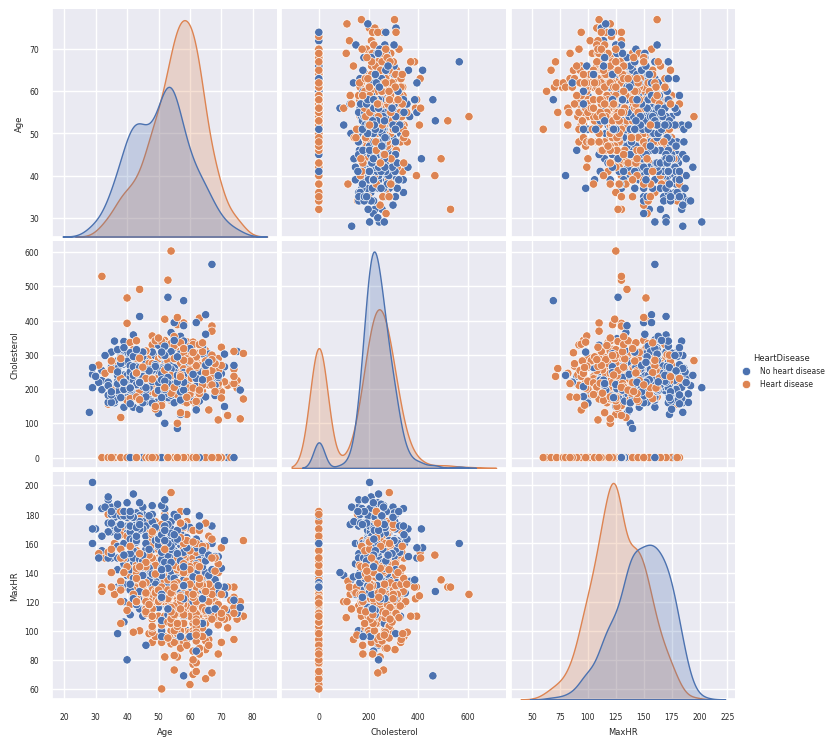

In [ ]:
selected_columns = [column_titles[0], column_titles[4], column_titles[7]]  # Age, Cholesterol and MaxHR

hue_labels = {0: "No heart disease", 1: "Heart disease"}

pairplot = sns.set(font_scale=0.5)  # Set the font scale (adjust the value as needed)
pairplot = sns.pairplot(df[selected_columns + [column_titles[11]]], hue=column_titles[11], hue_order=[0,1])

# Manually update the legend labels
for t, label in zip(pairplot._legend.texts, [hue_labels[0], hue_labels[1]]):
    t.set_text(label)

# Move the legend slightly to the right
pairplot._legend.set_bbox_to_anchor((0.9, 0.5))  # (x, y) coordinates
pairplot._legend.set_loc("center left")  # Keep it aligned to the left vertically

plt.show()

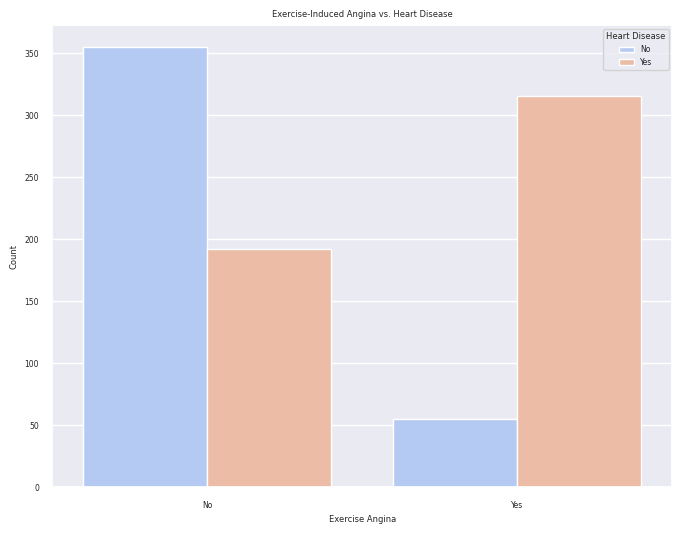

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x=df.columns[8], hue=df.columns[11], palette="coolwarm")

plt.title("Exercise-Induced Angina vs. Heart Disease")
plt.xlabel("Exercise Angina")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.show()

In [ ]:
# a lot of outliers in Cholesterol

# find the correlation between cholesterol and heartDisease
before_corr = round(df['Cholesterol'].corr(df['HeartDisease']),3)
print("Correlation:", before_corr)

Correlation: -0.233


In [ ]:
np.set_printoptions(precision=4, suppress=True)
print("maximum values, per feature are: ", np.max(inputData, axis=0))
print("minimum values, per feature are: ", np.min(inputData, axis=0))

maximum values, per feature are:  [ 77.    1.    3.  200.  603.    1.    2.  202.    1.    6.2   2. ]
minimum values, per feature are:  [28.   0.   0.   0.   0.   0.   0.  60.   0.  -2.6  0. ]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
inputData = scaler.fit_transform(inputData)

In [ ]:
#let's discuss about value range (after MinMax)
print("maximum values, per feature are: ", np.max(inputData, axis=0))
print("minimum values, per feature are: ", np.min(inputData, axis=0))

maximum values, per feature are:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
minimum values, per feature are:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Use stratified k fold with k = 4 for train/test sets
# We will take in account both the health status and gender (because we have
# imbalance on the latter)
from sklearn.model_selection import StratifiedKFold

# Extract the gender column from inputData (second column)
gender = inputData[:, 1]

# Combine health status (outputData) and gender to create stratification labels
# This results in unique labels for each combination of health status and gender
strat_labels = outputData.astype(str) + "_" + gender.astype(str)

n_splits= 4
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42) #random state ensures that each split is the same

for train_index, test_index in stratified_kfold.split(inputData, strat_labels):
  print("Train Index:", train_index)
  print("Test Index:", test_index)

  y_train, y_test = outputData[train_index], outputData[test_index]

  # Count the number of healthy (0) and non-healthy (1) patients in each set
  train_counts = np.bincount(y_train)
  test_counts = np.bincount(y_test)

  # print results
  print("\n")
  print(f"  Train - Healthy: {train_counts[0]}, Non-Healthy: {train_counts[1]}, Ratio: {train_counts[0]/train_counts[1]:.2f}") # keep 2 decimals
  print(f"  Test  - Healthy: {test_counts[0]}, Non-Healthy: {test_counts[1]}, Ratio: {train_counts[0]/train_counts[1]:.2f}") # keep 2 decimals
  print("\n")



Train Index: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  16  18  23  24
  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  49  53  54  55  56  59  60  61  62  63  64  65  67  70
  71  72  73  74  75  76  78  80  82  83  84  85  86  87  88  89  90  91
  92  93  95  96  97  98 101 104 105 106 107 108 109 111 112 114 115 116
 117 118 121 123 124 125 126 127 130 131 132 134 135 136 137 138 139 140
 141 142 143 147 148 150 151 152 153 157 158 159 160 161 162 163 164 165
 166 168 169 170 171 172 174 176 177 178 179 180 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 200 201 202 203 204 205 206 207
 208 209 211 212 213 214 215 216 217 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 237 238 239 241 242 243 244 245 246 247
 250 251 252 253 254 255 256 257 258 259 261 263 264 267 268 269 270 272
 273 274 276 277 278 279 280 282 283 284 285 286 287 288 291 293 294 295
 296 297 298 299 300 302 304 305 306 3

In [ ]:
#save results
import os
drive_path = '/content/drive/MyDrive/ML/Results'

#Check if the folder exists, and create it if necessary
if not os.path.exists(drive_path):
  os.makedirs(drive_path)

figure_folder_path = os.path.join(drive_path, 'Figures')
if not os.path.exists(figure_folder_path):
  os.makedirs(figure_folder_path)


In [ ]:
# initialize empty list
data = []

# create the pandas DataFrame
output = pd.DataFrame()

# create a dataframe for metrics also
metrics = pd.DataFrame()

'''
data, columns=["Model", "Set", "Balanced", "TotalSamples", \
      "Non-Healthy Samples", "TP", "TN", "FP", "FN","ROC-AUC"]
'''

'\ndata, columns=["Model", "Set", "Balanced", "TotalSamples",       "Non-Healthy Samples", "TP", "TN", "FP", "FN","ROC-AUC"]\n'

In [ ]:
#import necessary ML models and performance scores
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier #personal choice
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
import seaborn as sns
def funcy_cf_plot(cf_matrix, class_names, fullMatrixName, directoryToSave):
  '''
  class names: list of the form ['a','b','b', etc]
  we will keep two decimals
  '''
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n" for v1,v2 in zip(group_counts, group_percentages)]

  ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')

  ax.set_xlabel('Predicted heart disease')
  ax.set_ylabel('Actual heart disease')

  # Ticket labels - must be in alphabetical order
  ax.xaxis.set_ticklabels(class_names)
  ax.yaxis.set_ticklabels(class_names)

  #save the figure
  figure_path = os.path.join(directoryToSave, fullMatrixName)
  plt.savefig(figure_path)

  plt.show()

In [ ]:
def one_model_sim_function(modelName, clf, output, metrics, foldId, inputData, outputData,\
                           train_index, test_index,\
                           figure_folder_path):

  print('. working with classifier ', modelName)

  #train the classifier
  start_time = time.time() # Record start time
  clf.fit(inputData[train_index,:], outputData[train_index])
  end_time = time.time() # Record end time

  trainingTime = end_time - start_time
  print('. just finished with training in {:.4f} seconds'.format(trainingTime))

  #use the trained classifier to estimate the outputs

  start_time = time.time() # Record start time
  predicted_output_values_train = clf.predict(inputData[train_index,:])
  predicted_output_prob_train = clf.predict_proba(inputData[train_index, :])[:, 1] # Probability for positive class
  end_time = time.time() # Record end time

  predTimeTrain = end_time - start_time

  start_time = time.time() # Record start time
  predicted_output_values_test = clf.predict(inputData[test_index,:])
  predicted_output_prob_test = clf.predict_proba(inputData[test_index, :])[:, 1] # Probability for positive class
  end_time = time.time() # Record end time

  predTimeTest = end_time - start_time

  #confusion matrices here
  cf_matrix_train = confusion_matrix(outputData[train_index],\
                                  predicted_output_values_train )

  cf_matrix_test = confusion_matrix(outputData[test_index],\
                                predicted_output_values_test )


  #create some figures with confusion matrices
  funcy_cf_plot(cf_matrix_train, ['HeartDisease','NoHeartDisease'],\
                modelName + str(foldCounter) + "Train",\
                figure_folder_path)
  funcy_cf_plot(cf_matrix_test, ['HeartDisease','NoHeartDisease'],\
                modelName + str(foldCounter) + "Test",\
                figure_folder_path)

  print('. just finished with saving the confusion matrices.')

  # calculate and print metrics for training set
  train_accuracy = accuracy_score(outputData[train_index], predicted_output_values_train)
  train_precision = precision_score(outputData[train_index], predicted_output_values_train)
  train_recall = recall_score(outputData[train_index], predicted_output_values_train)
  train_f1 = f1_score(outputData[train_index], predicted_output_values_train)
  train_auc = roc_auc_score(outputData[train_index], predicted_output_prob_train)


  print(f"Train - Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1 Score: {train_f1:.2f}, ROC-AUC: {train_auc:.2f}")


  # calculate and print metrics for test set
  test_accuracy = accuracy_score(outputData[test_index], predicted_output_values_test)
  test_precision = precision_score(outputData[test_index], predicted_output_values_test)
  test_recall = recall_score(outputData[test_index], predicted_output_values_test)
  test_f1 = f1_score(outputData[test_index], predicted_output_values_test)
  test_auc = roc_auc_score(outputData[test_index], predicted_output_prob_test)

  print(f"Test  - Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1 Score: {test_f1:.2f}, ROC-AUC: {test_auc:.2f}")


  # add line for metrics (train) to a csv

  tmp_line_to_append = {'Model': modelName, 'Set': "Train", "Fold" : foldId, "Accuracy" : train_accuracy, "Precision" : train_precision, "Recall" : train_recall, "F1" : train_f1, "ROC-AUC" : train_auc}
  metrics = pd.concat([metrics, pd.DataFrame([tmp_line_to_append])], ignore_index=True)


  # add line for metrics (test) to a csv

  tmp_line_to_append = {'Model': modelName, 'Set': "Test", "Fold" : foldId, "Accuracy" : test_accuracy, "Precision" : test_precision, "Recall" : test_recall, "F1" : test_f1, "ROC-AUC" : test_auc}
  metrics = pd.concat([metrics, pd.DataFrame([tmp_line_to_append])], ignore_index=True)



  #add line for train data

  tmp_line_to_append = {'Model': modelName, 'Set': "Train", 'Balanced' : "Balanced", 'TotalSamples': sum(outputData[train_index]==0)+sum(outputData[train_index]==1)\
                        ,'Non-Healthy Samples' : sum(outputData[train_index]==1), "TP" : cf_matrix_train[1,1], "TN" : cf_matrix_train[0,0] \
                        , "FP" : cf_matrix_train[0,1], "FN" : cf_matrix_train[1,0], "ROC-AUC" : train_auc}

  output = pd.concat([output, pd.DataFrame([tmp_line_to_append])], ignore_index=True)




  #add line for test data
  tmp_line_to_append = {'Model': modelName, 'Set': "Test", 'Balanced' : "Balanced", 'TotalSamples': sum(outputData[test_index]==0)+sum(outputData[test_index]==1)\
                        ,'Non-Healthy Samples' : sum(outputData[test_index]==1), "TP" : cf_matrix_test[1,1], "TN" : cf_matrix_test[0,0] \
                        , "FP" : cf_matrix_test[0,1], "FN" : cf_matrix_test[1,0], "ROC-AUC" : test_auc}


  output = pd.concat([output, pd.DataFrame([tmp_line_to_append])], ignore_index=True)



  print('. just finished with data append to csv file.')
  print("\n")



  return output, metrics

In [ ]:
# Hyperparameter Optimization
# Below are some common variables (and libraries) for each architecture

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import time

n_iter = 20 # number of iterations
scoring = 'accuracy' # metric
cv = 4 # 4-fold cross-validation
random_state = 42 # seed
n_jobs = -1 # use all CPU cores

we are currently in fold set no:  1
Hyperparameter optimization took 2.70 seconds
Best parameters found: {'solver': 'lsqr', 'shrinkage': 0.2222222222222222}
Best cross-validation accuracy: 0.8037790697674418
. working with classifier  LDA
. just finished with training in 0.0056 seconds


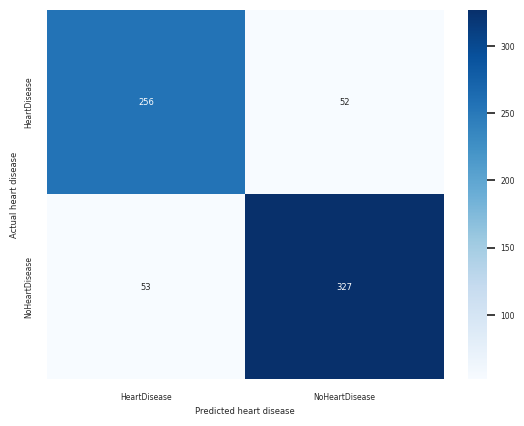

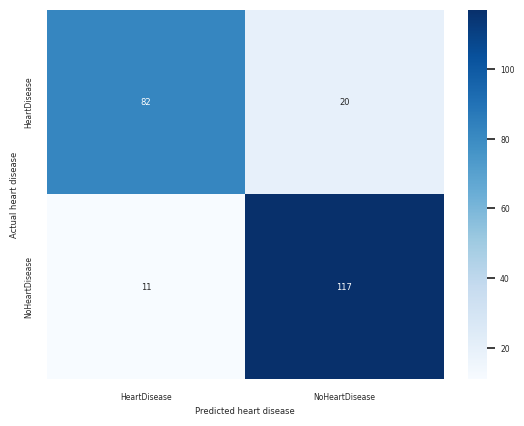

. just finished with saving the confusion matrices.
Train - Accuracy: 0.85, Precision: 0.86, Recall: 0.86, F1 Score: 0.86, ROC-AUC: 0.91
Test  - Accuracy: 0.87, Precision: 0.85, Recall: 0.91, F1 Score: 0.88, ROC-AUC: 0.91
. just finished with data append to csv file.


Hyperparameter optimization took 0.55 seconds
Best parameters found: {'C': 0.30584494295802445, 'fit_intercept': False, 'penalty': 'l2'}
Best cross-validation accuracy: 0.813953488372093
. working with classifier  LR
. just finished with training in 0.0073 seconds


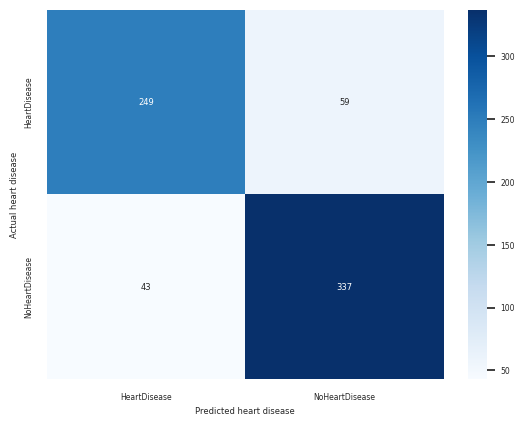

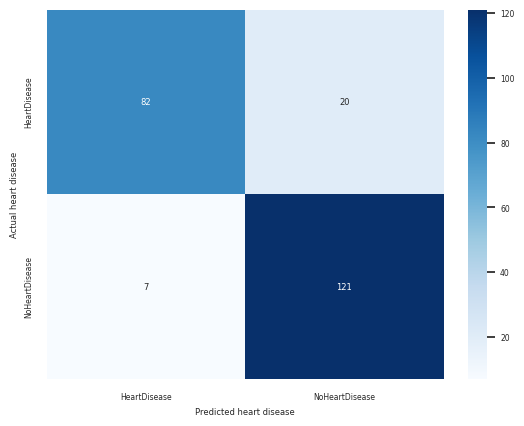

. just finished with saving the confusion matrices.
Train - Accuracy: 0.85, Precision: 0.85, Recall: 0.89, F1 Score: 0.87, ROC-AUC: 0.91
Test  - Accuracy: 0.88, Precision: 0.86, Recall: 0.95, F1 Score: 0.90, ROC-AUC: 0.91
. just finished with data append to csv file.


Hyperparameter optimization took 0.30 seconds
Best parameters found: {'criterion': 'gini', 'max_depth': 33, 'min_samples_split': 77, 'splitter': 'random'}
Best cross-validation accuracy: 0.8183139534883721
. working with classifier  Ctree
. just finished with training in 0.0035 seconds


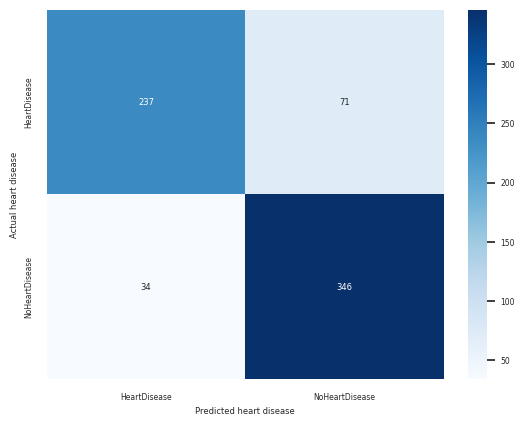

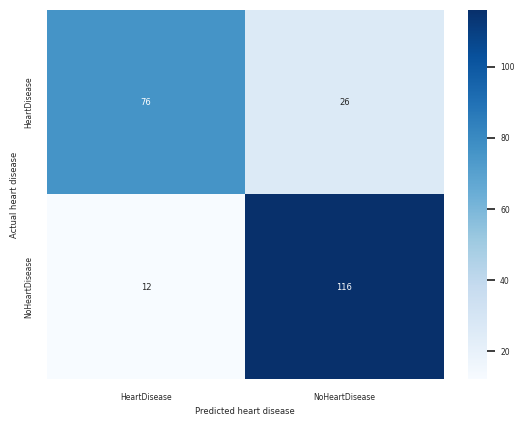

. just finished with saving the confusion matrices.
Train - Accuracy: 0.85, Precision: 0.83, Recall: 0.91, F1 Score: 0.87, ROC-AUC: 0.93
Test  - Accuracy: 0.83, Precision: 0.82, Recall: 0.91, F1 Score: 0.86, ROC-AUC: 0.92
. just finished with data append to csv file.


Hyperparameter optimization took 39.27 seconds
Best parameters found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 52, 'n_estimators': 144}
Best cross-validation accuracy: 0.8415697674418604
. working with classifier  RF
. just finished with training in 0.3938 seconds


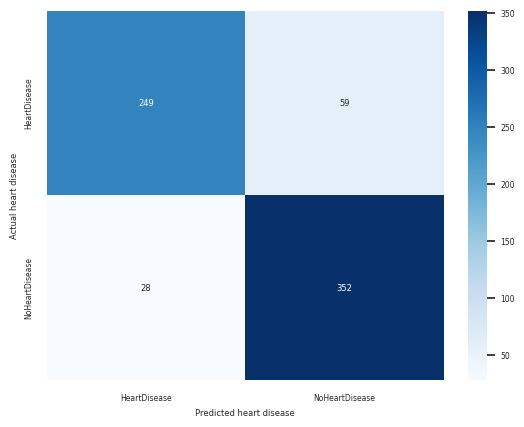

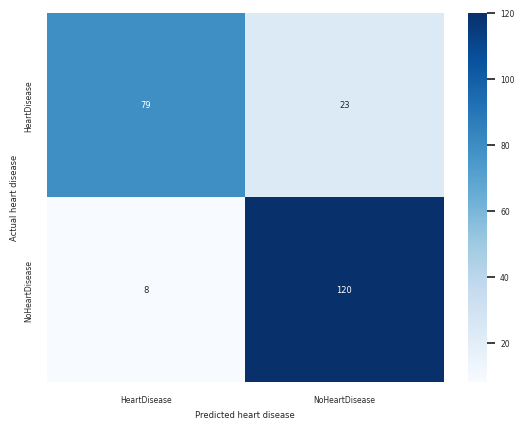

. just finished with saving the confusion matrices.
Train - Accuracy: 0.87, Precision: 0.86, Recall: 0.93, F1 Score: 0.89, ROC-AUC: 0.93
Test  - Accuracy: 0.87, Precision: 0.84, Recall: 0.94, F1 Score: 0.89, ROC-AUC: 0.93
. just finished with data append to csv file.


Hyperparameter optimization took 1.07 seconds
Best parameters found: {'algorithm': 'brute', 'leaf_size': 89, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best cross-validation accuracy: 0.8299418604651163
. working with classifier  kNN
. just finished with training in 0.0055 seconds


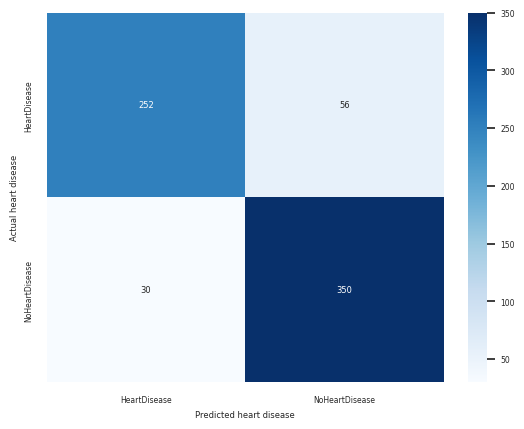

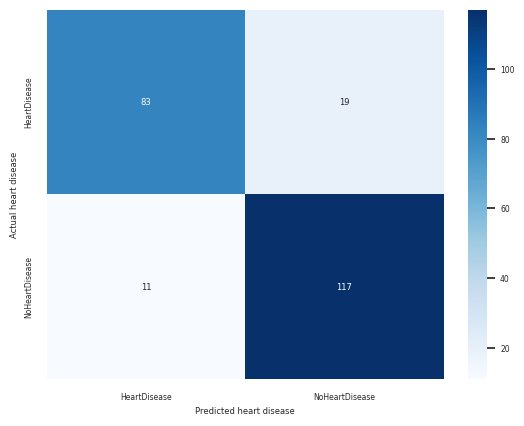

. just finished with saving the confusion matrices.
Train - Accuracy: 0.88, Precision: 0.86, Recall: 0.92, F1 Score: 0.89, ROC-AUC: 0.95
Test  - Accuracy: 0.87, Precision: 0.86, Recall: 0.91, F1 Score: 0.89, ROC-AUC: 0.92
. just finished with data append to csv file.


Hyperparameter optimization took 0.24 seconds
Best parameters found: {'var_smoothing': 2.848035868435799e-08}
Best cross-validation accuracy: 0.8212209302325582
. working with classifier  NB
. just finished with training in 0.0032 seconds


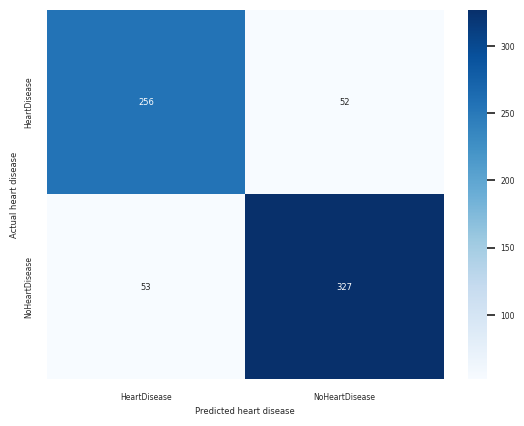

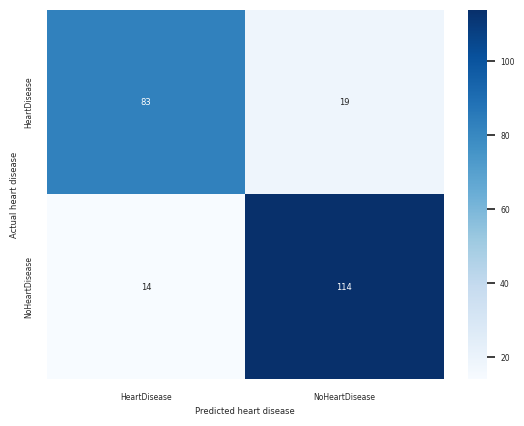

. just finished with saving the confusion matrices.
Train - Accuracy: 0.85, Precision: 0.86, Recall: 0.86, F1 Score: 0.86, ROC-AUC: 0.92
Test  - Accuracy: 0.86, Precision: 0.86, Recall: 0.89, F1 Score: 0.87, ROC-AUC: 0.92
. just finished with data append to csv file.


Hyperparameter optimization took 4.71 seconds
Best parameters found: {'C': 1.426496115986653, 'degree': 9, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}
Best cross-validation accuracy: 0.813953488372093
. working with classifier  SVM
. just finished with training in 0.0547 seconds


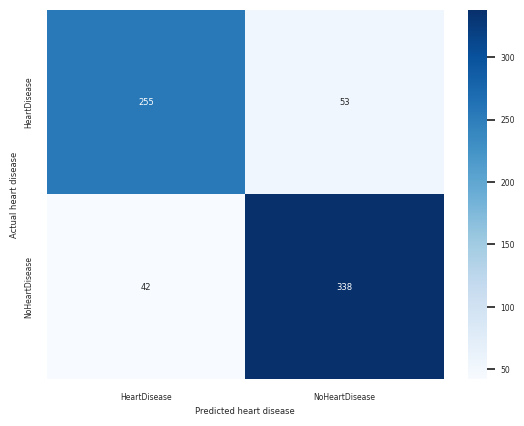

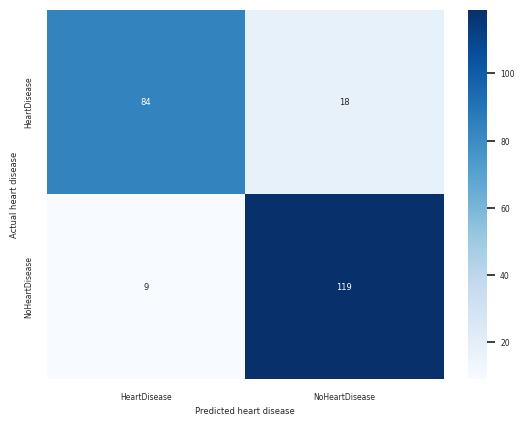

. just finished with saving the confusion matrices.
Train - Accuracy: 0.86, Precision: 0.86, Recall: 0.89, F1 Score: 0.88, ROC-AUC: 0.92
Test  - Accuracy: 0.88, Precision: 0.87, Recall: 0.93, F1 Score: 0.90, ROC-AUC: 0.90
. just finished with data append to csv file.




/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Hyperparameter optimization took 41.91 seconds
Best parameters found: {'activation': 'relu', 'alpha': 3.4370861113902182, 'batch_size': 119, 'learning_rate': 'adaptive', 'max_iter': 671, 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.8066860465116279
. working with classifier  MLP
. just finished with training in 0.3970 seconds


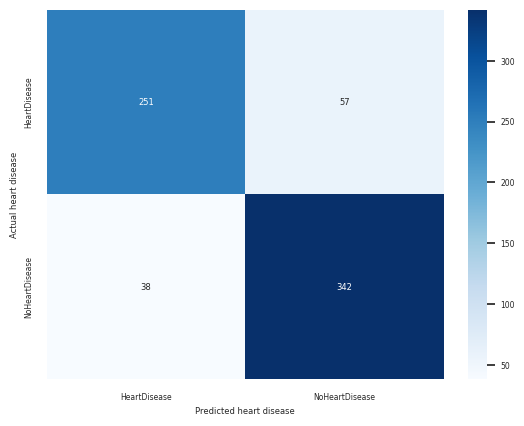

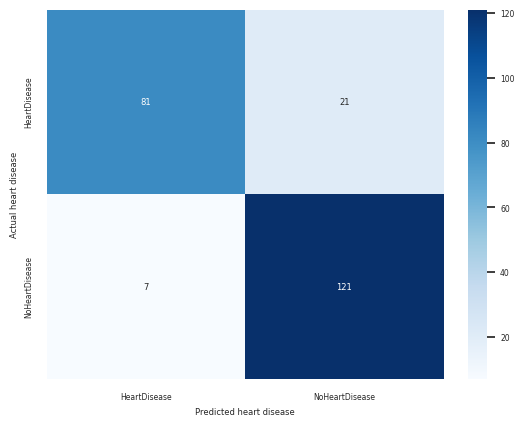

. just finished with saving the confusion matrices.
Train - Accuracy: 0.86, Precision: 0.86, Recall: 0.90, F1 Score: 0.88, ROC-AUC: 0.93
Test  - Accuracy: 0.88, Precision: 0.85, Recall: 0.95, F1 Score: 0.90, ROC-AUC: 0.91
. just finished with data append to csv file.


we are currently in fold set no:  2
Hyperparameter optimization took 0.32 seconds
Best parameters found: {'solver': 'lsqr', 'shrinkage': 0.2222222222222222}
Best cross-validation accuracy: 0.8401162790697675
. working with classifier  LDA
. just finished with training in 0.0027 seconds


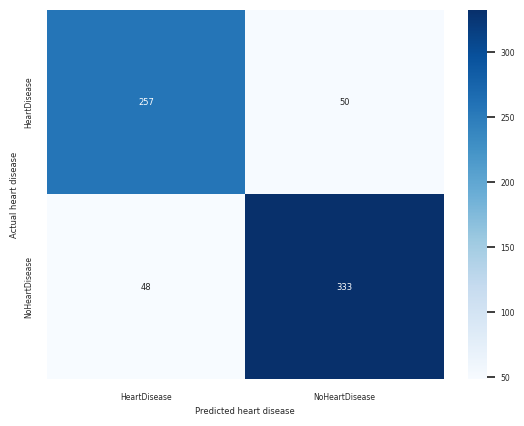

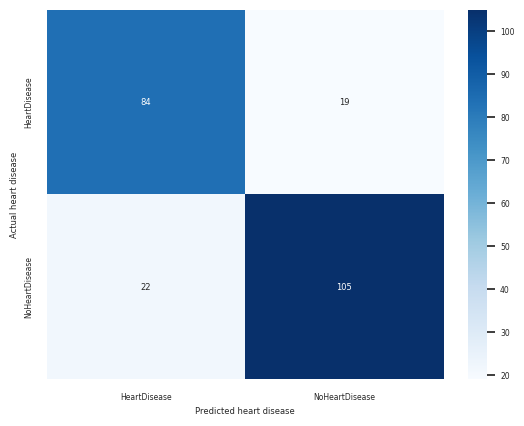

. just finished with saving the confusion matrices.
Train - Accuracy: 0.86, Precision: 0.87, Recall: 0.87, F1 Score: 0.87, ROC-AUC: 0.92
Test  - Accuracy: 0.82, Precision: 0.85, Recall: 0.83, F1 Score: 0.84, ROC-AUC: 0.89
. just finished with data append to csv file.


Hyperparameter optimization took 0.53 seconds
Best parameters found: {'C': 0.30584494295802445, 'fit_intercept': False, 'penalty': 'l2'}
Best cross-validation accuracy: 0.8473837209302326
. working with classifier  LR
. just finished with training in 0.0078 seconds


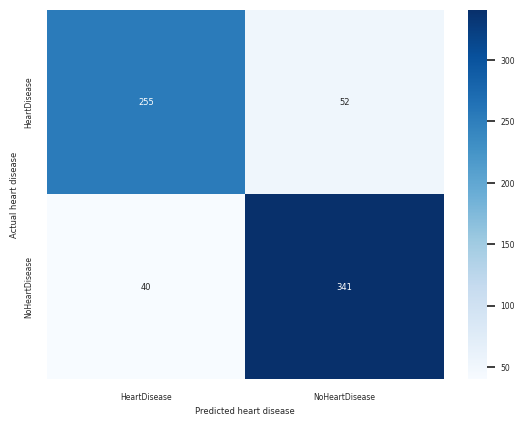

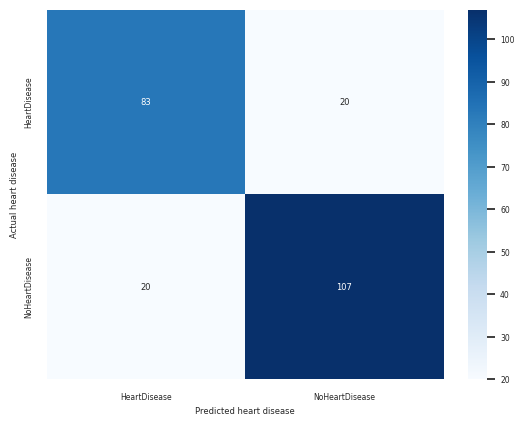

. just finished with saving the confusion matrices.
Train - Accuracy: 0.87, Precision: 0.87, Recall: 0.90, F1 Score: 0.88, ROC-AUC: 0.92
Test  - Accuracy: 0.83, Precision: 0.84, Recall: 0.84, F1 Score: 0.84, ROC-AUC: 0.89
. just finished with data append to csv file.


Hyperparameter optimization took 0.27 seconds
Best parameters found: {'criterion': 'entropy', 'max_depth': 89, 'min_samples_split': 50, 'splitter': 'best'}
Best cross-validation accuracy: 0.8401162790697674
. working with classifier  Ctree
. just finished with training in 0.0067 seconds


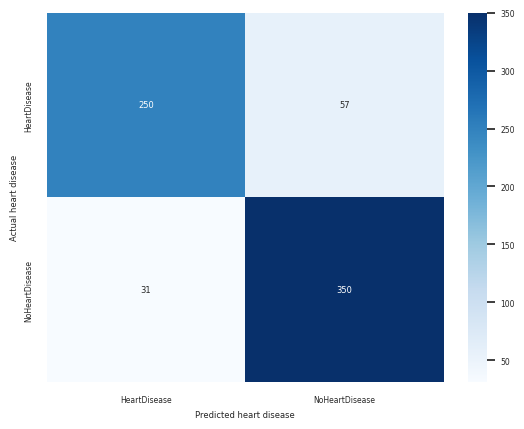

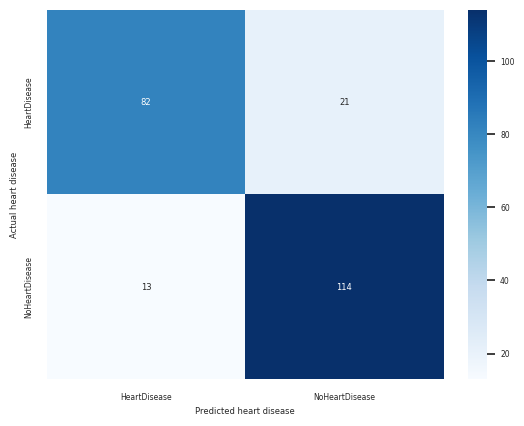

. just finished with saving the confusion matrices.
Train - Accuracy: 0.87, Precision: 0.86, Recall: 0.92, F1 Score: 0.89, ROC-AUC: 0.94
Test  - Accuracy: 0.85, Precision: 0.84, Recall: 0.90, F1 Score: 0.87, ROC-AUC: 0.91
. just finished with data append to csv file.


Hyperparameter optimization took 42.62 seconds
Best parameters found: {'criterion': 'entropy', 'max_depth': 53, 'min_samples_split': 3, 'n_estimators': 353}
Best cross-validation accuracy: 0.8531976744186046
. working with classifier  RF
. just finished with training in 0.7068 seconds


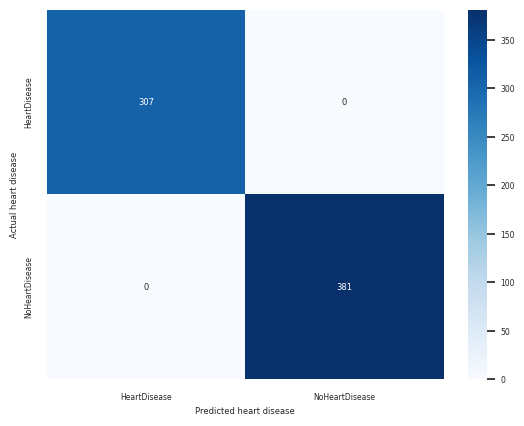

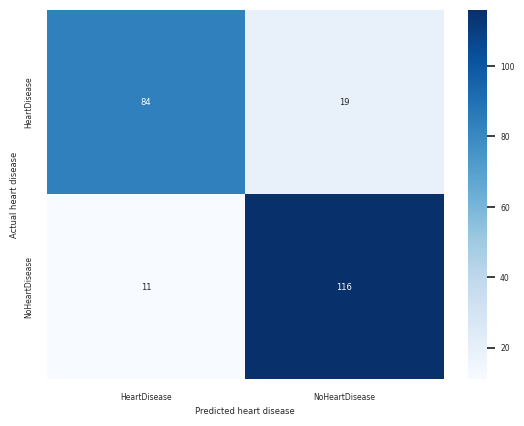

. just finished with saving the confusion matrices.
Train - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Test  - Accuracy: 0.87, Precision: 0.86, Recall: 0.91, F1 Score: 0.89, ROC-AUC: 0.92
. just finished with data append to csv file.


Hyperparameter optimization took 0.98 seconds
Best parameters found: {'algorithm': 'brute', 'leaf_size': 91, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best cross-validation accuracy: 0.8619186046511629
. working with classifier  kNN
. just finished with training in 0.0016 seconds


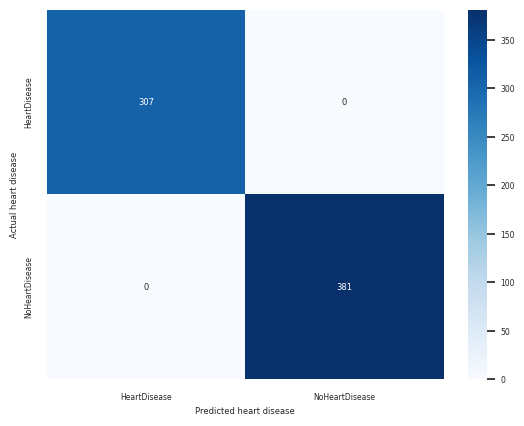

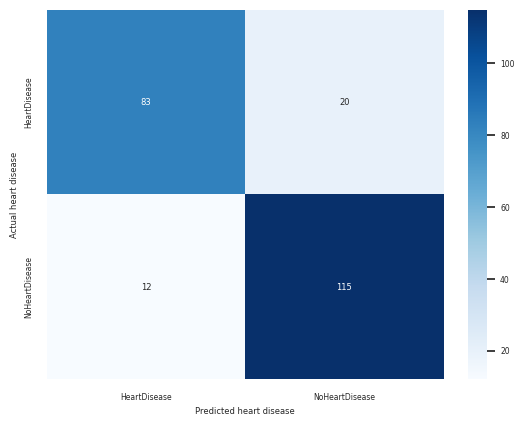

. just finished with saving the confusion matrices.
Train - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Test  - Accuracy: 0.86, Precision: 0.85, Recall: 0.91, F1 Score: 0.88, ROC-AUC: 0.91
. just finished with data append to csv file.


Hyperparameter optimization took 0.25 seconds
Best parameters found: {'var_smoothing': 2.848035868435799e-08}
Best cross-validation accuracy: 0.8372093023255814
. working with classifier  NB
. just finished with training in 0.0060 seconds


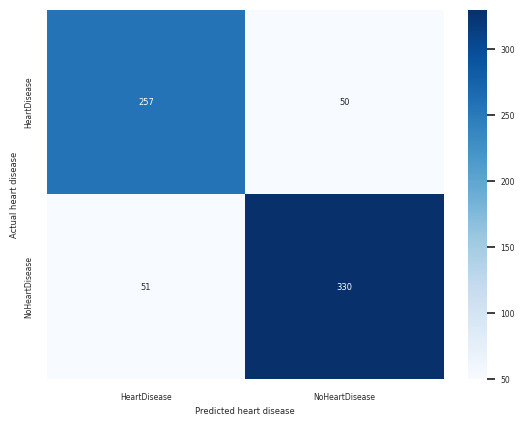

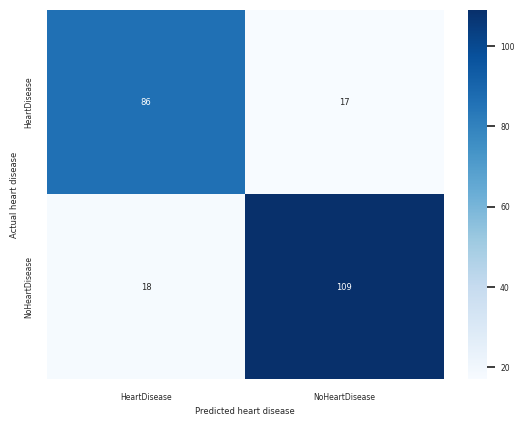

. just finished with saving the confusion matrices.
Train - Accuracy: 0.85, Precision: 0.87, Recall: 0.87, F1 Score: 0.87, ROC-AUC: 0.92
Test  - Accuracy: 0.85, Precision: 0.87, Recall: 0.86, F1 Score: 0.86, ROC-AUC: 0.91
. just finished with data append to csv file.


Hyperparameter optimization took 6.03 seconds
Best parameters found: {'C': 25.977998160001693, 'degree': 8, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}
Best cross-validation accuracy: 0.8517441860465116
. working with classifier  SVM
. just finished with training in 0.0950 seconds


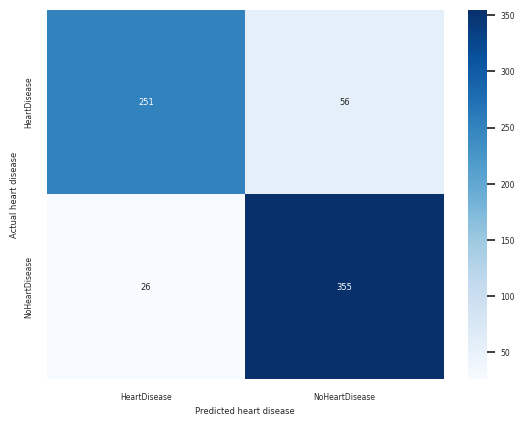

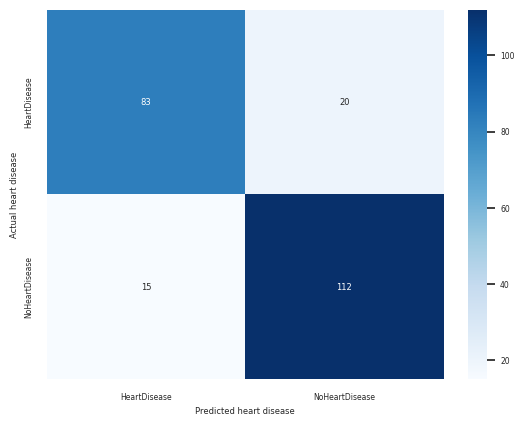

. just finished with saving the confusion matrices.
Train - Accuracy: 0.88, Precision: 0.86, Recall: 0.93, F1 Score: 0.90, ROC-AUC: 0.93
Test  - Accuracy: 0.85, Precision: 0.85, Recall: 0.88, F1 Score: 0.86, ROC-AUC: 0.91
. just finished with data append to csv file.


Hyperparameter optimization took 38.73 seconds
Best parameters found: {'activation': 'logistic', 'alpha': 5.496921323890797, 'batch_size': 39, 'learning_rate': 'invscaling', 'max_iter': 226, 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.8430232558139535
. working with classifier  MLP
. just finished with training in 0.2193 seconds


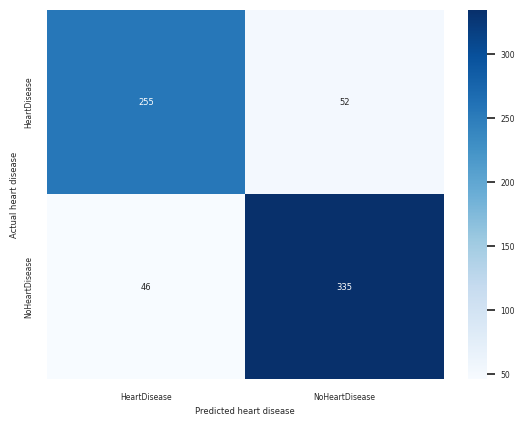

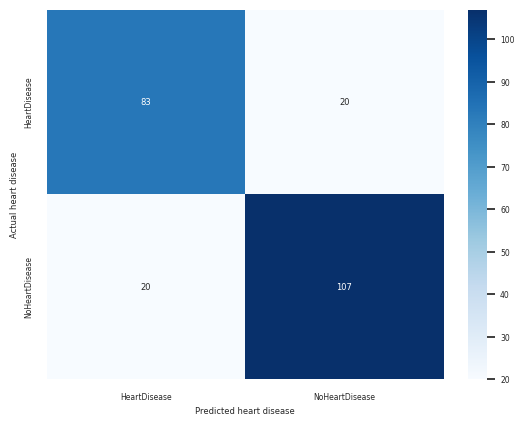

. just finished with saving the confusion matrices.
Train - Accuracy: 0.86, Precision: 0.87, Recall: 0.88, F1 Score: 0.87, ROC-AUC: 0.91
Test  - Accuracy: 0.83, Precision: 0.84, Recall: 0.84, F1 Score: 0.84, ROC-AUC: 0.89
. just finished with data append to csv file.


we are currently in fold set no:  3
Hyperparameter optimization took 0.34 seconds
Best parameters found: {'solver': 'eigen', 'shrinkage': 0.1111111111111111}
Best cross-validation accuracy: 0.8214561769054981
. working with classifier  LDA
. just finished with training in 0.0044 seconds


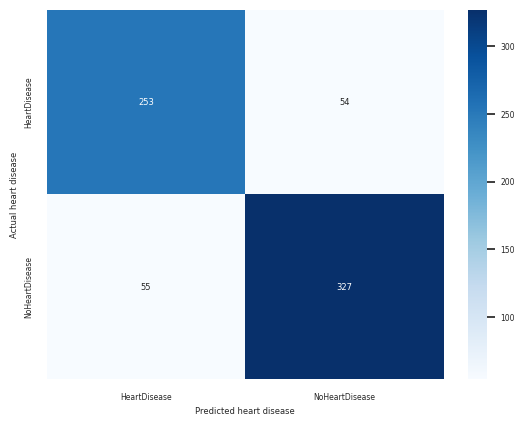

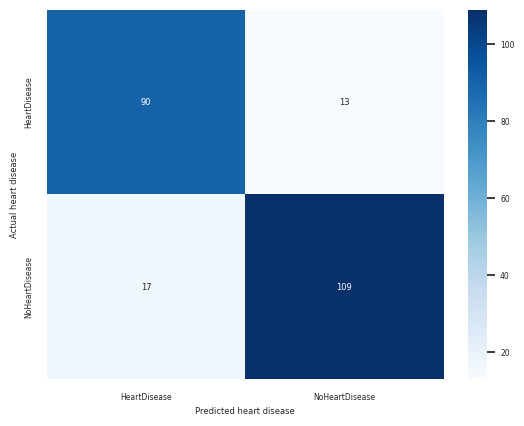

. just finished with saving the confusion matrices.
Train - Accuracy: 0.84, Precision: 0.86, Recall: 0.86, F1 Score: 0.86, ROC-AUC: 0.91
Test  - Accuracy: 0.87, Precision: 0.89, Recall: 0.87, F1 Score: 0.88, ROC-AUC: 0.93
. just finished with data append to csv file.


Hyperparameter optimization took 0.51 seconds
Best parameters found: {'C': 0.30584494295802445, 'fit_intercept': False, 'penalty': 'l2'}
Best cross-validation accuracy: 0.8156254200833445
. working with classifier  LR
. just finished with training in 0.0049 seconds


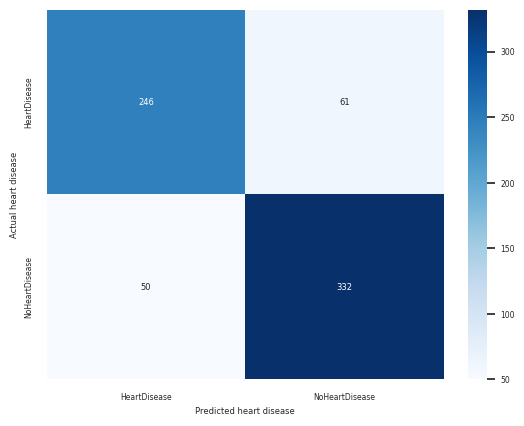

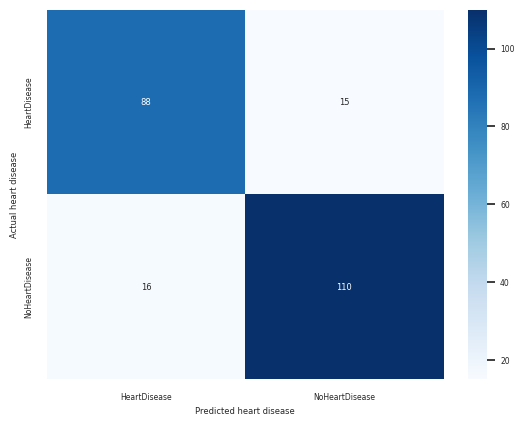

. just finished with saving the confusion matrices.
Train - Accuracy: 0.84, Precision: 0.84, Recall: 0.87, F1 Score: 0.86, ROC-AUC: 0.90
Test  - Accuracy: 0.86, Precision: 0.88, Recall: 0.87, F1 Score: 0.88, ROC-AUC: 0.93
. just finished with data append to csv file.


Hyperparameter optimization took 0.46 seconds
Best parameters found: {'criterion': 'entropy', 'max_depth': 51, 'min_samples_split': 56, 'splitter': 'random'}
Best cross-validation accuracy: 0.8286059954294932
. working with classifier  Ctree
. just finished with training in 0.0026 seconds


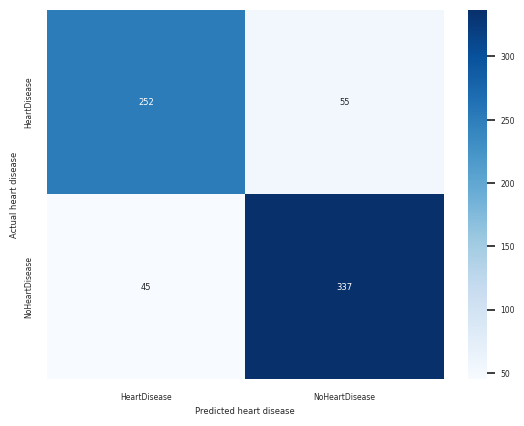

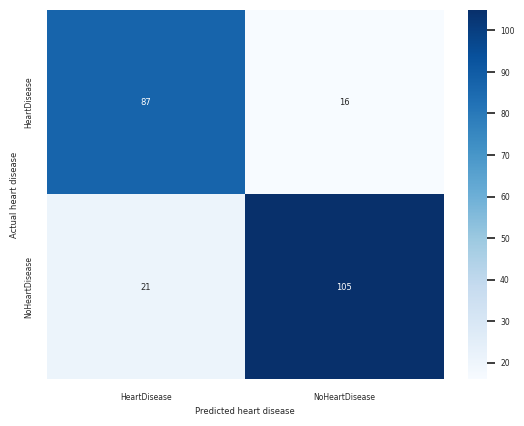

. just finished with saving the confusion matrices.
Train - Accuracy: 0.85, Precision: 0.86, Recall: 0.88, F1 Score: 0.87, ROC-AUC: 0.93
Test  - Accuracy: 0.84, Precision: 0.87, Recall: 0.83, F1 Score: 0.85, ROC-AUC: 0.91
. just finished with data append to csv file.


Hyperparameter optimization took 39.95 seconds
Best parameters found: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 399}
Best cross-validation accuracy: 0.8693204731818793
. working with classifier  RF
. just finished with training in 0.6604 seconds


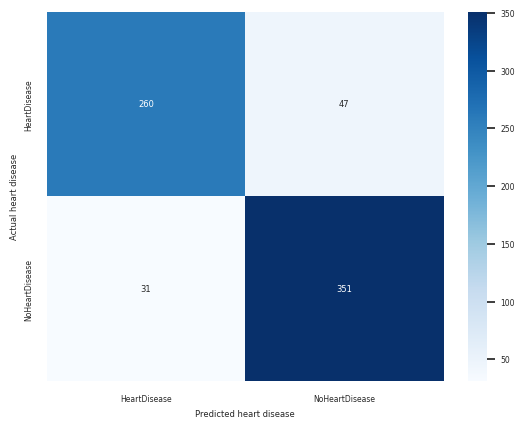

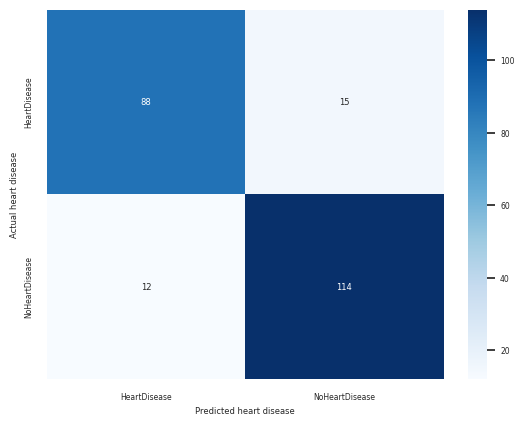

. just finished with saving the confusion matrices.
Train - Accuracy: 0.89, Precision: 0.88, Recall: 0.92, F1 Score: 0.90, ROC-AUC: 0.95
Test  - Accuracy: 0.88, Precision: 0.88, Recall: 0.90, F1 Score: 0.89, ROC-AUC: 0.94
. just finished with data append to csv file.


Hyperparameter optimization took 0.99 seconds
Best parameters found: {'algorithm': 'brute', 'leaf_size': 89, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best cross-validation accuracy: 0.8315885871756957
. working with classifier  kNN
. just finished with training in 0.0040 seconds


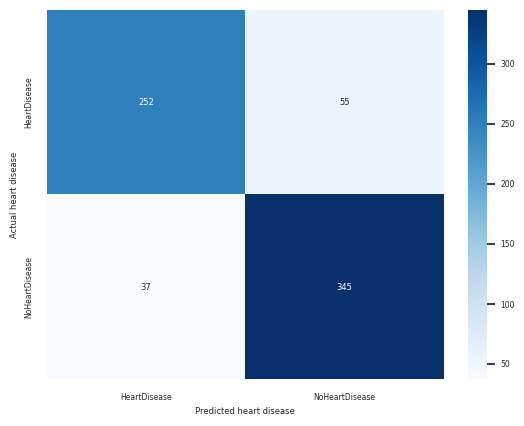

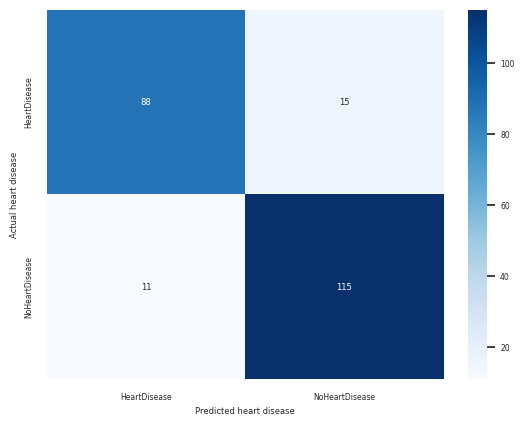

. just finished with saving the confusion matrices.
Train - Accuracy: 0.87, Precision: 0.86, Recall: 0.90, F1 Score: 0.88, ROC-AUC: 0.95
Test  - Accuracy: 0.89, Precision: 0.88, Recall: 0.91, F1 Score: 0.90, ROC-AUC: 0.93
. just finished with data append to csv file.


Hyperparameter optimization took 0.26 seconds
Best parameters found: {'var_smoothing': 0.01}
Best cross-validation accuracy: 0.8287152170990725
. working with classifier  NB
. just finished with training in 0.0050 seconds


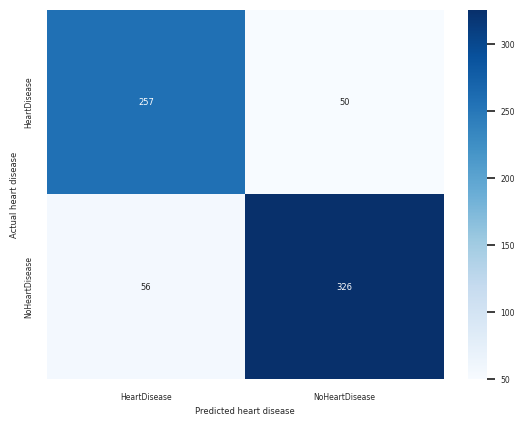

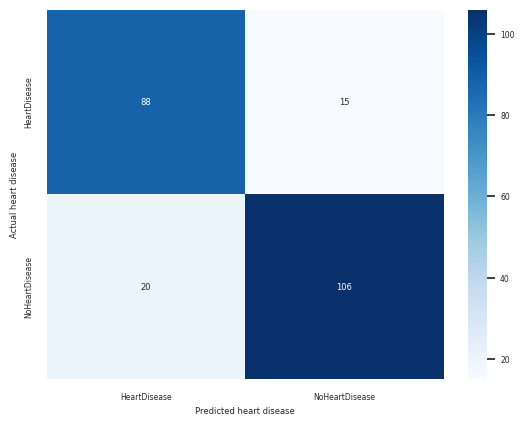

. just finished with saving the confusion matrices.
Train - Accuracy: 0.85, Precision: 0.87, Recall: 0.85, F1 Score: 0.86, ROC-AUC: 0.91
Test  - Accuracy: 0.85, Precision: 0.88, Recall: 0.84, F1 Score: 0.86, ROC-AUC: 0.93
. just finished with data append to csv file.


Hyperparameter optimization took 6.84 seconds
Best parameters found: {'C': 99.32115592912174, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}
Best cross-validation accuracy: 0.822884460276919
. working with classifier  SVM
. just finished with training in 0.1337 seconds


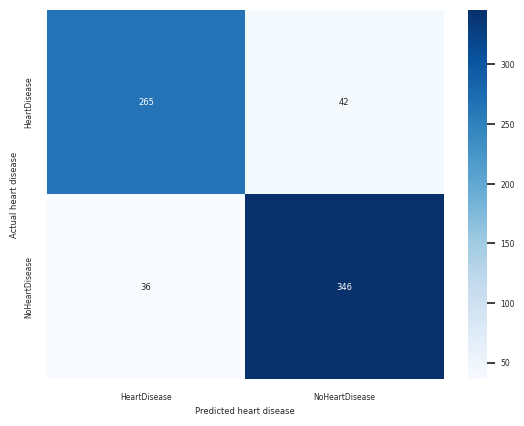

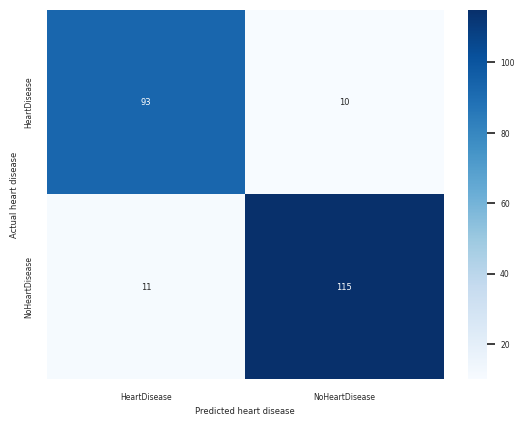

. just finished with saving the confusion matrices.
Train - Accuracy: 0.89, Precision: 0.89, Recall: 0.91, F1 Score: 0.90, ROC-AUC: 0.94
Test  - Accuracy: 0.91, Precision: 0.92, Recall: 0.91, F1 Score: 0.92, ROC-AUC: 0.94
. just finished with data append to csv file.


Hyperparameter optimization took 38.85 seconds
Best parameters found: {'activation': 'tanh', 'alpha': 6.283860093330873, 'batch_size': 123, 'learning_rate': 'adaptive', 'max_iter': 253, 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.8156506250840166
. working with classifier  MLP
. just finished with training in 0.5410 seconds


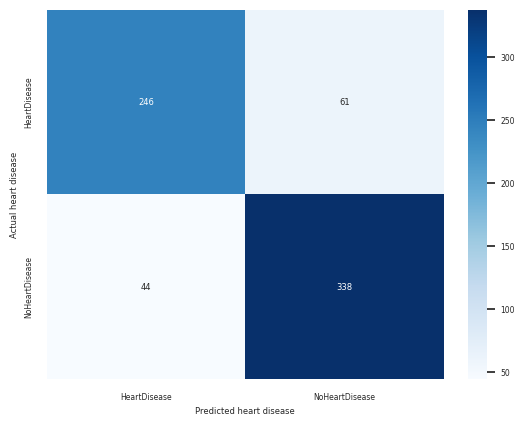

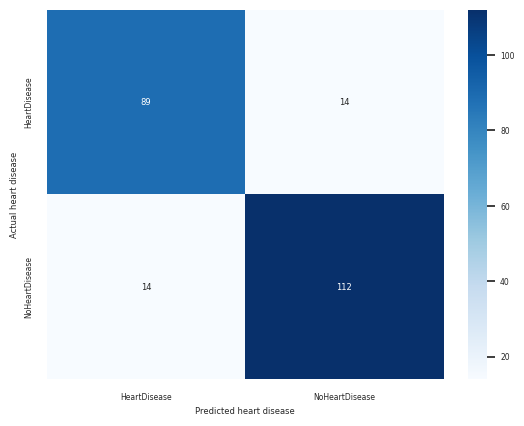

. just finished with saving the confusion matrices.
Train - Accuracy: 0.85, Precision: 0.85, Recall: 0.88, F1 Score: 0.87, ROC-AUC: 0.91
Test  - Accuracy: 0.88, Precision: 0.89, Recall: 0.89, F1 Score: 0.89, ROC-AUC: 0.93
. just finished with data append to csv file.


we are currently in fold set no:  4
Hyperparameter optimization took 0.31 seconds
Best parameters found: {'solver': 'eigen', 'shrinkage': 0.5555555555555556}
Best cross-validation accuracy: 0.8200110902002957
. working with classifier  LDA
. just finished with training in 0.0069 seconds


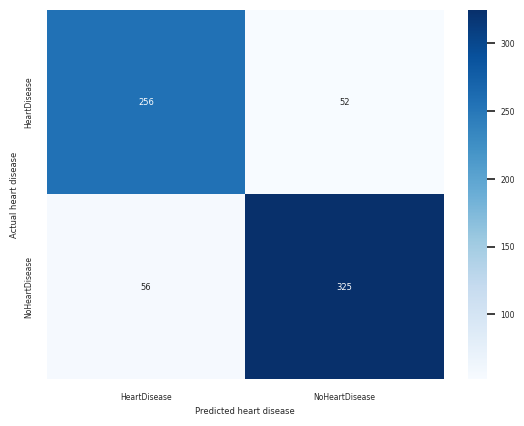

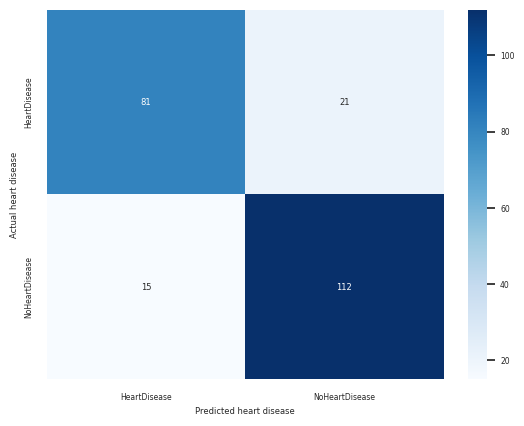

. just finished with saving the confusion matrices.
Train - Accuracy: 0.84, Precision: 0.86, Recall: 0.85, F1 Score: 0.86, ROC-AUC: 0.91
Test  - Accuracy: 0.84, Precision: 0.84, Recall: 0.88, F1 Score: 0.86, ROC-AUC: 0.90
. just finished with data append to csv file.


Hyperparameter optimization took 0.64 seconds
Best parameters found: {'C': 0.30584494295802445, 'fit_intercept': False, 'penalty': 'l2'}
Best cross-validation accuracy: 0.827244925393198
. working with classifier  LR
. just finished with training in 0.0095 seconds


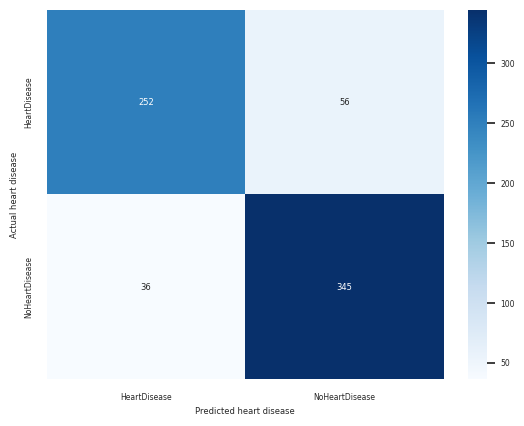

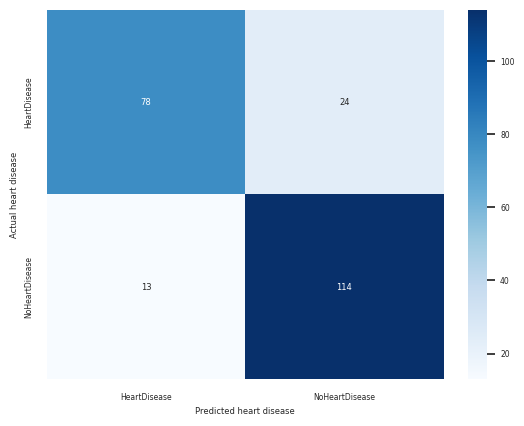

. just finished with saving the confusion matrices.
Train - Accuracy: 0.87, Precision: 0.86, Recall: 0.91, F1 Score: 0.88, ROC-AUC: 0.91
Test  - Accuracy: 0.84, Precision: 0.83, Recall: 0.90, F1 Score: 0.86, ROC-AUC: 0.90
. just finished with data append to csv file.


Hyperparameter optimization took 0.47 seconds
Best parameters found: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 3, 'splitter': 'random'}
Best cross-validation accuracy: 0.8329496572119908
. working with classifier  Ctree
. just finished with training in 0.0023 seconds


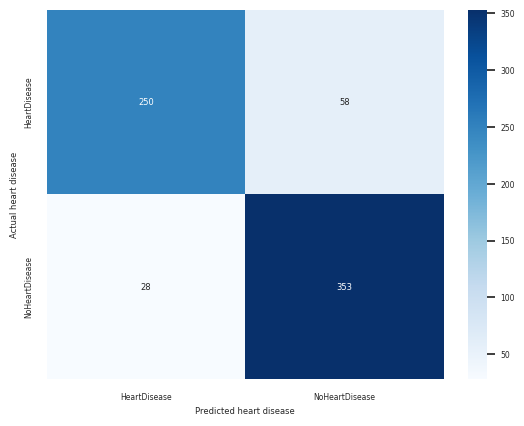

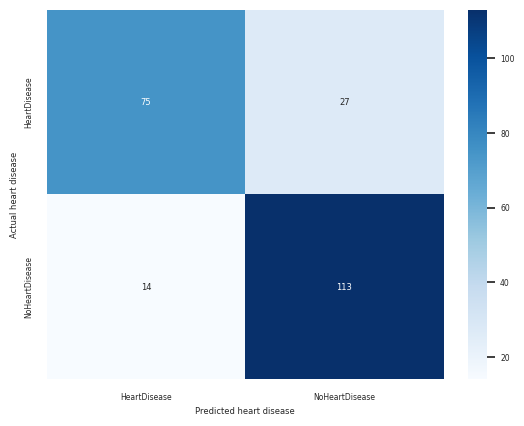

. just finished with saving the confusion matrices.
Train - Accuracy: 0.88, Precision: 0.86, Recall: 0.93, F1 Score: 0.89, ROC-AUC: 0.92
Test  - Accuracy: 0.82, Precision: 0.81, Recall: 0.89, F1 Score: 0.85, ROC-AUC: 0.88
. just finished with data append to csv file.


Hyperparameter optimization took 39.00 seconds
Best parameters found: {'criterion': 'log_loss', 'max_depth': 44, 'min_samples_split': 9, 'n_estimators': 440}
Best cross-validation accuracy: 0.8562306761661513
. working with classifier  RF
. just finished with training in 0.8345 seconds


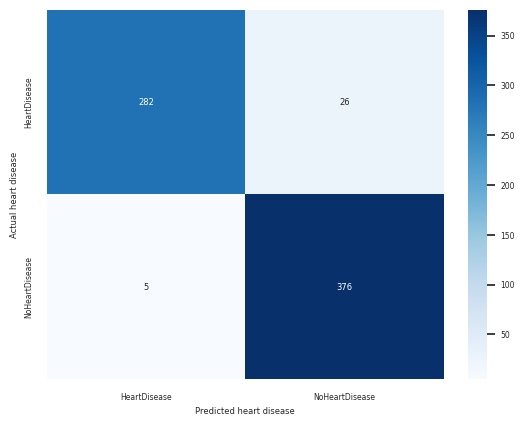

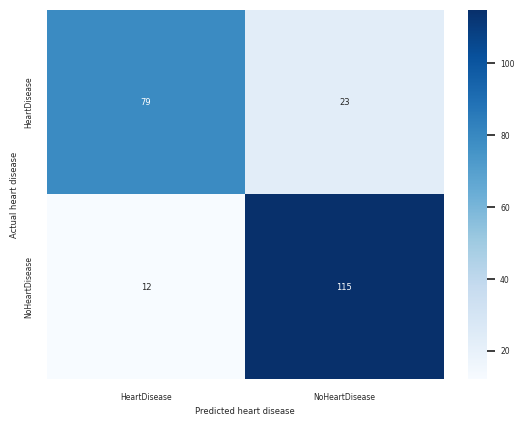

. just finished with saving the confusion matrices.
Train - Accuracy: 0.96, Precision: 0.94, Recall: 0.99, F1 Score: 0.96, ROC-AUC: 1.00
Test  - Accuracy: 0.85, Precision: 0.83, Recall: 0.91, F1 Score: 0.87, ROC-AUC: 0.92
. just finished with data append to csv file.


Hyperparameter optimization took 1.01 seconds
Best parameters found: {'algorithm': 'brute', 'leaf_size': 91, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best cross-validation accuracy: 0.8606247479499932
. working with classifier  kNN
. just finished with training in 0.0041 seconds


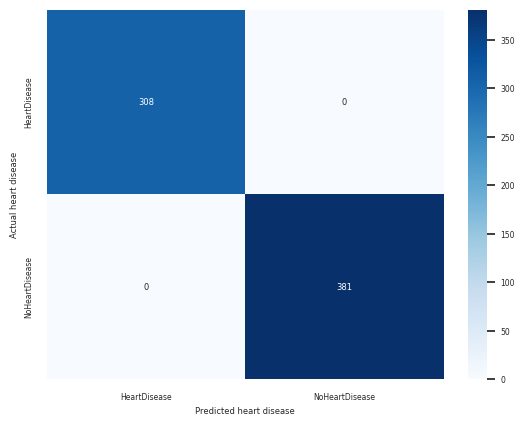

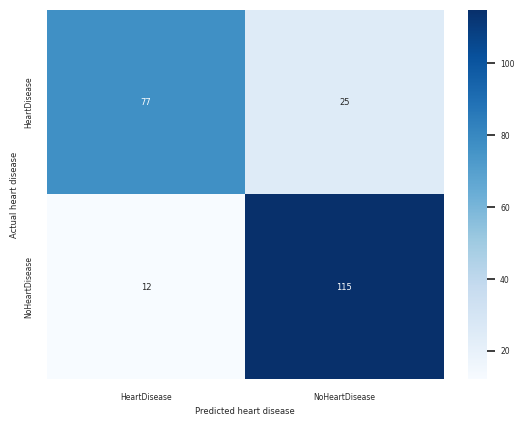

. just finished with saving the confusion matrices.
Train - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00, ROC-AUC: 1.00
Test  - Accuracy: 0.84, Precision: 0.82, Recall: 0.91, F1 Score: 0.86, ROC-AUC: 0.89
. just finished with data append to csv file.


Hyperparameter optimization took 0.26 seconds
Best parameters found: {'var_smoothing': 2.848035868435799e-08}
Best cross-validation accuracy: 0.8272701303938701
. working with classifier  NB
. just finished with training in 0.0031 seconds


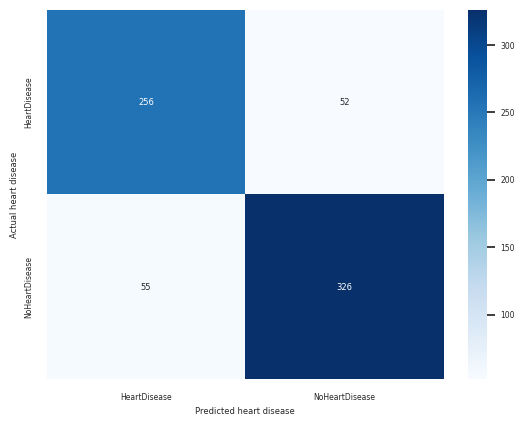

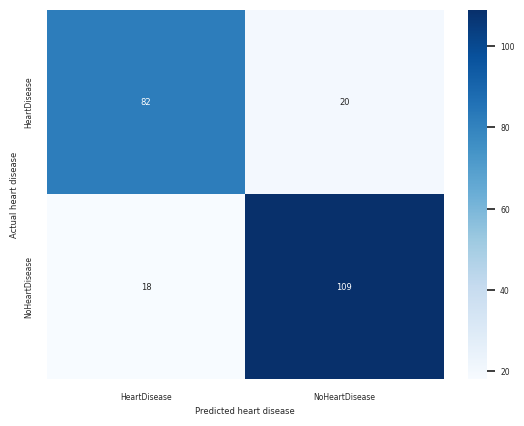

. just finished with saving the confusion matrices.
Train - Accuracy: 0.84, Precision: 0.86, Recall: 0.86, F1 Score: 0.86, ROC-AUC: 0.92
Test  - Accuracy: 0.83, Precision: 0.84, Recall: 0.86, F1 Score: 0.85, ROC-AUC: 0.90
. just finished with data append to csv file.


Hyperparameter optimization took 7.16 seconds
Best parameters found: {'C': 42.61558744912447, 'degree': 6, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}
Best cross-validation accuracy: 0.853365707756419
. working with classifier  SVM
. just finished with training in 0.0652 seconds


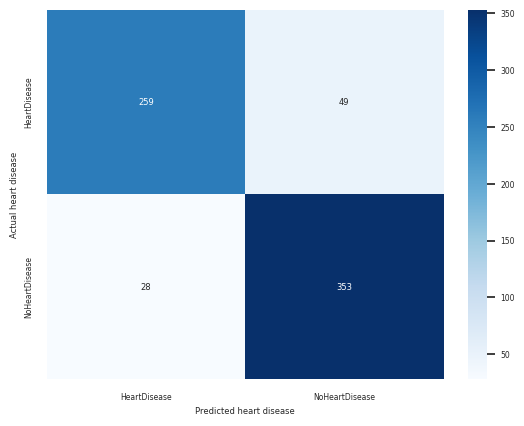

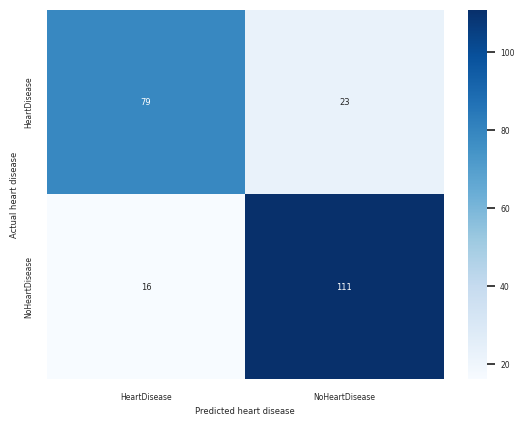

. just finished with saving the confusion matrices.
Train - Accuracy: 0.89, Precision: 0.88, Recall: 0.93, F1 Score: 0.90, ROC-AUC: 0.94
Test  - Accuracy: 0.83, Precision: 0.83, Recall: 0.87, F1 Score: 0.85, ROC-AUC: 0.89
. just finished with data append to csv file.




/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Hyperparameter optimization took 37.89 seconds
Best parameters found: {'activation': 'logistic', 'alpha': 5.496921323890797, 'batch_size': 39, 'learning_rate': 'invscaling', 'max_iter': 226, 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.825791437021105
. working with classifier  MLP
. just finished with training in 0.1937 seconds


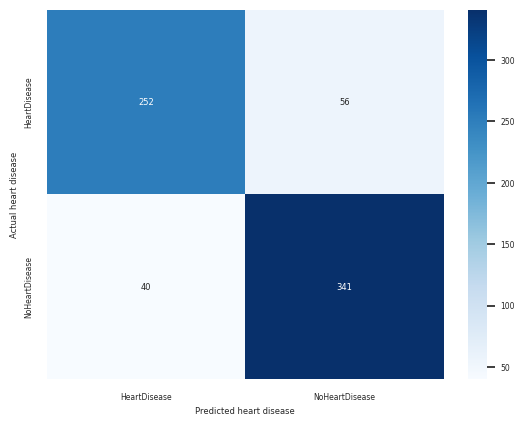

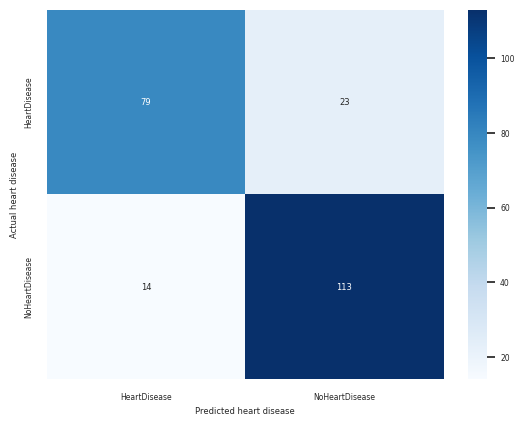

. just finished with saving the confusion matrices.
Train - Accuracy: 0.86, Precision: 0.86, Recall: 0.90, F1 Score: 0.88, ROC-AUC: 0.91
Test  - Accuracy: 0.84, Precision: 0.83, Recall: 0.89, F1 Score: 0.86, ROC-AUC: 0.90
. just finished with data append to csv file.


Total time for all models (with HypeOpt): 407.47 seconds


In [ ]:
# Start runing each classification model
# We pass the tuned arguments to each model
foldCounter = 1
start = time.time()
for train_index, test_index in\
  stratified_kfold.split(inputData, strat_labels):

  print('we are currently in fold set no: ', str(foldCounter))

  # We run Hyperparameter Optimization on each fold. Fit the data on train only!

  #1. LDA
  # Define the parameters for LinearDiscriminantAnalysis HypeOpt
  param_distributions = {
      'solver' :  ['lsqr', 'eigen'],
      'shrinkage' : [None, 'auto'] + list(np.linspace(0.0, 1.0, 10)) #svd doesnt have shrinkage
  }

  # Set up the RandomizedSearchCV with the LDA model
  random_searchLDA = RandomizedSearchCV(
      estimator = LinearDiscriminantAnalysis(),
      param_distributions=param_distributions,
      n_iter = n_iter,
      scoring = scoring,
      cv = cv,
      random_state = random_state,
      n_jobs = n_jobs
  )

  # Timer start
  start_time = time.time()

  # Fit RandomizedSearchCV on train
  random_searchLDA.fit(inputData[train_index,:], outputData[train_index])

  # Timer stop
  end_time = time.time()

  # Calculate execution time
  execution_time = end_time - start_time
  print(f"Hyperparameter optimization took {execution_time:.2f} seconds")


  # Output the best parameters and the best score
  print("Best parameters found:", random_searchLDA.best_params_)
  print("Best cross-validation accuracy:", random_searchLDA.best_score_)
  #now use the hypeopt model
  output, metrics = one_model_sim_function("LDA", LinearDiscriminantAnalysis(**random_searchLDA.best_params_), output, metrics, foldCounter, inputData, outputData,\
                           train_index, test_index,\
                          figure_folder_path)



  #2. LR
  # Define the parameters for LogisticRegression HypeOpt
  param_distributions = {
      'penalty' :  [None, 'l2'], #lbfgs supports only L2 penalty and None
      'C' : uniform(0.1, 10),
      'fit_intercept' : [True, False]
  }

  # Set up the RandomizedSearchCV with the LR model
  random_searchLR = RandomizedSearchCV(
      estimator = LogisticRegression(),
      param_distributions=param_distributions,
      n_iter = n_iter,
      scoring = scoring,
      cv = cv,
      random_state= random_state,
      n_jobs = n_jobs
  )

  # Timer start
  start_time = time.time()

  # Fit RandomizedSearchCV on train
  random_searchLR.fit(inputData[train_index,:], outputData[train_index])

  # Timer stop
  end_time = time.time()

  # Calculate execution time
  execution_time = end_time - start_time
  print(f"Hyperparameter optimization took {execution_time:.2f} seconds")


  # Output the best parameters and the best score
  print("Best parameters found:", random_searchLR.best_params_)
  print("Best cross-validation accuracy:", random_searchLR.best_score_)


  output, metrics = one_model_sim_function("LR", LogisticRegression(**random_searchLR.best_params_), output, metrics, foldCounter, inputData, outputData,\
                           train_index, test_index,\
                          figure_folder_path)


  #3. Ctree
  # Define the parameters for DecisionTree HypeOpt
  param_distributions = {
      'criterion' :  ['gini', 'entropy', 'log_loss'],
      'splitter' : ['best', 'random'],
      'max_depth' : randint(1,100),
      'min_samples_split' : randint(2,100)
  }

  # Set up the RandomizedSearchCV with the LR model
  random_searchDT = RandomizedSearchCV(
      estimator = DecisionTreeClassifier(),
      param_distributions=param_distributions,
      n_iter = n_iter,
      scoring = scoring,
      cv = cv,
      random_state = random_state,
      n_jobs = n_jobs
  )

  # Timer start
  start_time = time.time()

  # Fit RandomizedSearchCV on train
  random_searchDT.fit(inputData[train_index,:], outputData[train_index])

  # Timer stop
  end_time = time.time()

  # Calculate execution time
  execution_time = end_time - start_time
  print(f"Hyperparameter optimization took {execution_time:.2f} seconds")


  # Output the best parameters and the best score
  print("Best parameters found:", random_searchDT.best_params_)
  print("Best cross-validation accuracy:", random_searchDT.best_score_)

  output, metrics = one_model_sim_function("Ctree", DecisionTreeClassifier(**random_searchDT.best_params_), output, metrics, foldCounter, inputData, outputData,\
                           train_index, test_index,\
                          figure_folder_path)




  #4. RF
  # Define the parameters for RandomForest HypeOpt
  param_distributions = {
      'criterion' :  ['gini', 'entropy', 'log_loss'],
      'n_estimators' : randint(10,500),
      'max_depth' : randint(1,100),
      'min_samples_split' : randint(2,100)
  }

  # Set up the RandomizedSearchCV with the RF model
  random_searchRF = RandomizedSearchCV(
      estimator = RandomForestClassifier(),
      param_distributions=param_distributions,
      n_iter = n_iter,
      scoring = scoring,
      cv = cv,
      random_state = random_state,
      n_jobs = n_jobs
  )

  # Timer start
  start_time = time.time()

  # Fit RandomizedSearchCV on train
  random_searchRF.fit(inputData[train_index,:], outputData[train_index])

  # Timer stop
  end_time = time.time()

  # Calculate execution time
  execution_time = end_time - start_time
  print(f"Hyperparameter optimization took {execution_time:.2f} seconds")


  # Output the best parameters and the best score
  print("Best parameters found:", random_searchRF.best_params_)
  print("Best cross-validation accuracy:", random_searchRF.best_score_)

  output, metrics = one_model_sim_function("RF", RandomForestClassifier(**random_searchRF.best_params_), output, metrics, foldCounter, inputData, outputData,\
                           train_index, test_index,\
                          figure_folder_path)



  #5. kNN
  # Define the parameters for kNearestNeighbors HypeOpt
  param_distributions = {
      'n_neighbors' :  randint(1,10),
      'weights' : ['uniform', 'distance'],
      'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
      'leaf_size' : randint(30,100),
      'p': randint(1,5)
  }

  # Set up the RandomizedSearchCV with the kNN model
  random_searchkNN = RandomizedSearchCV(
      estimator = KNeighborsClassifier(),
      param_distributions=param_distributions,
      n_iter = n_iter,
      scoring = scoring,
      cv = cv,
      random_state = random_state,
      n_jobs = n_jobs
  )

  # Timer start
  start_time = time.time()

  # Fit RandomizedSearchCV on train
  random_searchkNN.fit(inputData[train_index,:], outputData[train_index])

  # Timer stop
  end_time = time.time()

  # Calculate execution time
  execution_time = end_time - start_time
  print(f"Hyperparameter optimization took {execution_time:.2f} seconds")


  # Output the best parameters and the best score
  print("Best parameters found:", random_searchkNN.best_params_)
  print("Best cross-validation accuracy:", random_searchkNN.best_score_)
  output, metrics = one_model_sim_function("kNN", KNeighborsClassifier(**random_searchkNN.best_params_), output, metrics, foldCounter, inputData, outputData,\
                          train_index, test_index,\
                        figure_folder_path)


  #6. Gaussian NB
  # Define the parameters for Gaussian Naïve Bayes HypeOpt
  param_distributions = {
      'var_smoothing' : np.logspace(0, -9, num=100)
  }

  # Set up the RandomizedSearchCV with the NB model
  random_searchNB = RandomizedSearchCV(
      estimator = GaussianNB(),
      param_distributions=param_distributions,
      n_iter = n_iter,
      scoring = scoring,
      cv = cv,
      random_state = random_state,
      n_jobs = n_jobs
  )

  # Timer start
  start_time = time.time()

  # Fit RandomizedSearchCV on train
  random_searchNB.fit(inputData[train_index,:], outputData[train_index])

  # Timer stop
  end_time = time.time()

  # Calculate execution time
  execution_time = end_time - start_time
  print(f"Hyperparameter optimization took {execution_time:.2f} seconds")


  # Output the best parameters and the best score
  print("Best parameters found:", random_searchNB.best_params_)
  print("Best cross-validation accuracy:", random_searchNB.best_score_)

  output, metrics = one_model_sim_function("NB", GaussianNB(**random_searchNB.best_params_), output, metrics, foldCounter, inputData, outputData,\
                          train_index, test_index,\
                        figure_folder_path)


  #7. SVM (SVC)
  # Define the parameters for Support Vector Machines HypeOpt
  param_distributions = {
      'C' : uniform(0.1, 100),
      'kernel' : ['linear', 'rbf'],
      'gamma' : ['scale', 'auto'],
      'degree' : randint(1, 10),
      'probability' : [True] # We always need probability estimates in order to calculate ROC-AUC
  }

  # Set up the RandomizedSearchCV for SVM model HypeOpt
  random_searchSVC = RandomizedSearchCV(
      estimator = SVC(),
      param_distributions=param_distributions,
      n_iter = n_iter,
      scoring = scoring,
      cv = cv,
      random_state = random_state,
      n_jobs = n_jobs
  )

  # Timer start
  start_time = time.time()

  # Fit RandomizedSearchCV on train
  random_searchSVC.fit(inputData[train_index,:], outputData[train_index])

  # Timer stop
  end_time = time.time()

  # Calculate execution time
  execution_time = end_time - start_time
  print(f"Hyperparameter optimization took {execution_time:.2f} seconds")


  # Output the best parameters and the best score
  print("Best parameters found:", random_searchSVC.best_params_)
  print("Best cross-validation accuracy:", random_searchSVC.best_score_)

  output, metrics = one_model_sim_function("SVM", SVC(**random_searchSVC.best_params_), output, metrics, foldCounter, inputData, outputData,\
                          train_index, test_index,\
                        figure_folder_path)


  #8. Multi-layer Perceptron (MLP) Personal Choice
  # Define the parameters for Multi-Layer Perceptron HypeOpt
  param_distributions = {
      'activation' : ['identity', 'logistic', 'tanh', 'relu'],
      'solver' : ['lbfgs', 'sgd', 'adam'],
      'alpha' : uniform(0.1, 10),
      'batch_size' : randint(16, 128),
      'learning_rate' : ['constant', 'invscaling', 'adaptive'],
      'max_iter' : randint(10, 1000)
  }

  # Set up the RandomizedSearchCV with the MLP model
  random_searchMLP = RandomizedSearchCV(
      estimator = MLPClassifier(),
      param_distributions=param_distributions,
      n_iter = n_iter,
      scoring = scoring,
      cv = cv,
      random_state = random_state,
      n_jobs = n_jobs
  )

  # Timer start
  start_time = time.time()

  # Fit RandomizedSearchCV on train
  random_searchMLP.fit(inputData[train_index,:], outputData[train_index])

  # Timer stop
  end_time = time.time()

  # Calculate execution time
  execution_time = end_time - start_time
  print(f"Hyperparameter optimization took {execution_time:.2f} seconds")


  # Output the best parameters and the best score
  print("Best parameters found:", random_searchMLP.best_params_)
  print("Best cross-validation accuracy:", random_searchMLP.best_score_)

  output, metrics = one_model_sim_function("MLP", MLPClassifier(**random_searchMLP.best_params_), output, metrics, foldCounter, inputData, outputData,\
                          train_index, test_index,\
                        figure_folder_path)



  #update the fold counter
  foldCounter +=1;
stop = time.time()
print(f"Total time for all models (with HypeOpt): {stop-start:.2f} seconds")

In [ ]:
#write results to file
output.to_csv(drive_path + '/balancedDataOutcomes.csv', index=False)
metrics.to_csv(drive_path + '/metrics.csv', index=False)

In [ ]:
import scipy.stats as stats

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/ML/Results/metrics.csv')

# Check the first few rows
df.head()

,Model,Set,Fold,Accuracy,Precision,Recall,F1,ROC-AUC
0,LDA,Train,1,0.847384,0.862797,0.860526,0.861660,0.911603
1,LDA,Test,1,0.865217,0.854015,0.914062,0.883019,0.906327
2,LR,Train,1,0.851744,0.851010,0.886842,0.868557,0.909903
3,LR,Test,1,0.882609,0.858156,0.945312,0.899628,0.907399
4,Ctree,Train,1,0.847384,0.829736,0.910526,0.868256,0.925628


In [ ]:
# Filter to only include the Test set
test_set_df = df[df['Set'] == 'Test']

# Check the first few rows
test_set_df.head()

,Model,Set,Fold,Accuracy,Precision,Recall,F1,ROC-AUC
1,LDA,Test,1,0.865217,0.854015,0.914062,0.883019,0.906327
3,LR,Test,1,0.882609,0.858156,0.945312,0.899628,0.907399
5,Ctree,Test,1,0.834783,0.816901,0.906250,0.859259,0.917279
7,RF,Test,1,0.865217,0.839161,0.937500,0.885609,0.933211
9,kNN,Test,1,0.869565,0.860294,0.914062,0.886364,0.918696


Normality Check for LDA
  Shapiro-Wilk Test Result: ShapiroResult(statistic=0.9276898139071363, pvalue=0.580888609370964)


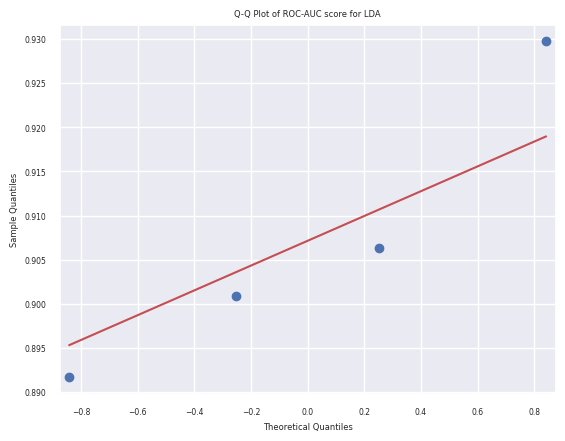

Normality Check for LR
  Shapiro-Wilk Test Result: ShapiroResult(statistic=0.9540580811565988, pvalue=0.7415363033533371)


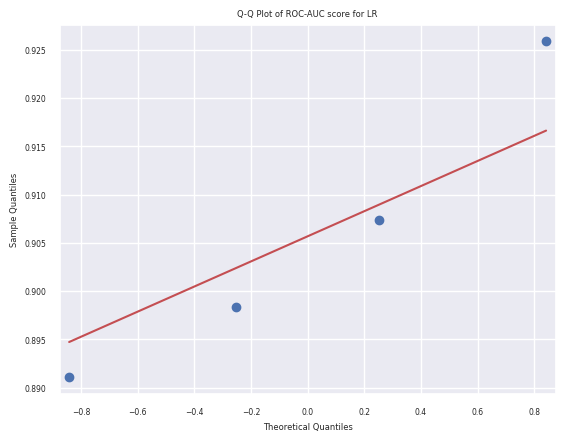

Normality Check for Ctree
  Shapiro-Wilk Test Result: ShapiroResult(statistic=0.8093113369046269, pvalue=0.11999466799568581)


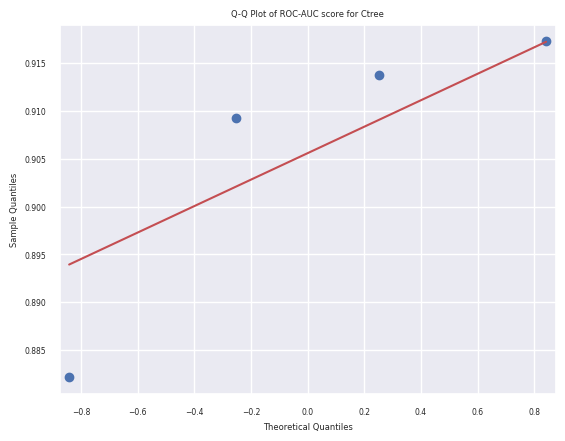

Normality Check for RF
  Shapiro-Wilk Test Result: ShapiroResult(statistic=0.8896586529153484, pvalue=0.3815283780982413)


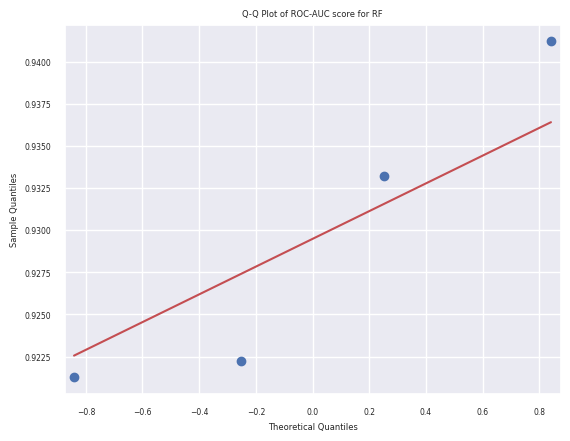

Normality Check for kNN
  Shapiro-Wilk Test Result: ShapiroResult(statistic=0.9959505764723139, pvalue=0.9855524187593789)


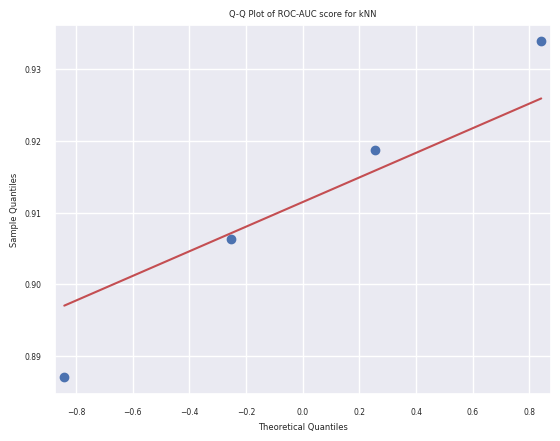

Normality Check for NB
  Shapiro-Wilk Test Result: ShapiroResult(statistic=0.97785507985638, pvalue=0.8893303526335904)


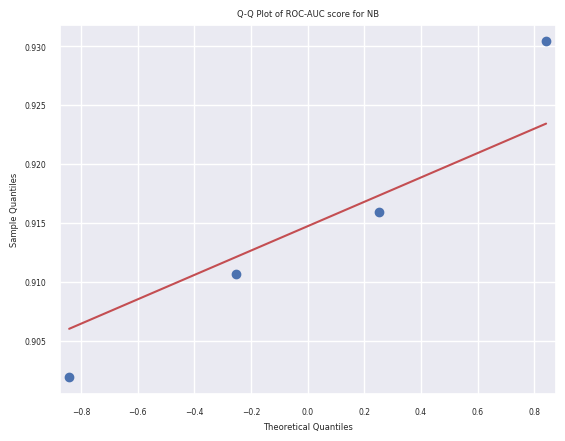

Normality Check for SVM
  Shapiro-Wilk Test Result: ShapiroResult(statistic=0.850326221161806, pvalue=0.22721836759276975)


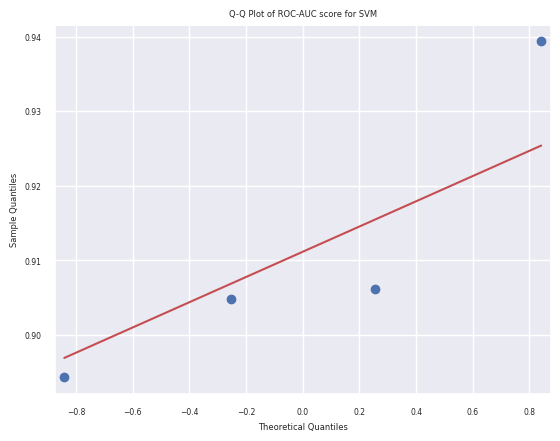

Normality Check for MLP
  Shapiro-Wilk Test Result: ShapiroResult(statistic=0.9179085950269893, pvalue=0.5252873573206985)


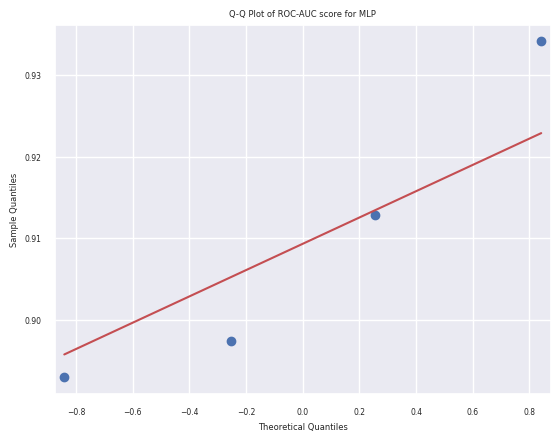


Shapiro-Wilk Test Results:

LDA: Statistic=0.9276898139071363, p-value=0.580888609370964
Good news! scores follow a normal distribution

LR: Statistic=0.9540580811565988, p-value=0.7415363033533371
Good news! scores follow a normal distribution

Ctree: Statistic=0.8093113369046269, p-value=0.11999466799568581
Good news! scores follow a normal distribution

RF: Statistic=0.8896586529153484, p-value=0.3815283780982413
Good news! scores follow a normal distribution

kNN: Statistic=0.9959505764723139, p-value=0.9855524187593789
Good news! scores follow a normal distribution

NB: Statistic=0.97785507985638, p-value=0.8893303526335904
Good news! scores follow a normal distribution

SVM: Statistic=0.850326221161806, p-value=0.22721836759276975
Good news! scores follow a normal distribution

MLP: Statistic=0.9179085950269893, p-value=0.5252873573206985
Good news! scores follow a normal distribution



In [ ]:
# Residuals for Normality Check (Grouped by Model)
import statsmodels.api as sm

# Unique models
models = test_set_df['Model'].unique()

# Initialize dictionary to store Shapiro-Wilk test results
shapiro_results = {}

# Loop through each model
for model in models:
    print(f"Normality Check for {model}")

    # Filter scores for the current model
    model_scores = test_set_df[test_set_df['Model'] == model]['ROC-AUC']

    # Shapiro-Wilk Test
    shapiro_test = stats.shapiro(model_scores)
    shapiro_results[model] = shapiro_test
    print(f"  Shapiro-Wilk Test Result: {shapiro_test}")

    # Q-Q Plot
    sm.qqplot(model_scores, line='s')
    plt.title(f"Q-Q Plot of ROC-AUC score for {model}")
    plt.show()

# Print all Shapiro results for reference
print("\nShapiro-Wilk Test Results:\n")
for model, result in shapiro_results.items():
    print(f"{model}: Statistic={result.statistic}, p-value={result.pvalue}")
    if result.pvalue <= 0.05:
      print( "Unfortunately scores significantly deviate from a normal distribution\n")
    else:
      print( "Good news! scores follow a normal distribution\n")

Levene's Test for Homogeneity of Variance: LeveneResult(statistic=0.22542398026726523, pvalue=0.9753286430268405)


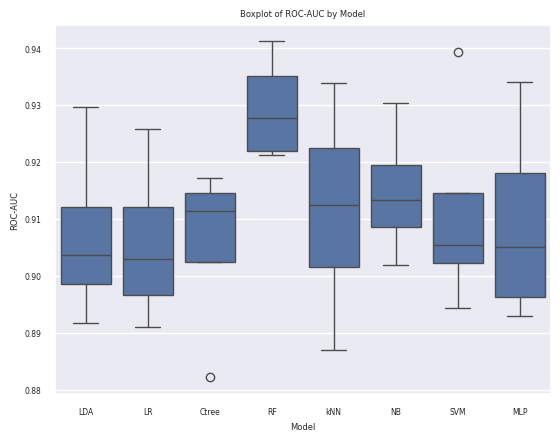


Good News! no significant difference in variances detected


In [ ]:
# 2. Homogeneity of Variances (since we have normal distribution)
levene_test = stats.levene(*[test_set_df[test_set_df['Model'] == model]['ROC-AUC']
                             for model in test_set_df['Model'].unique()])
print("Levene's Test for Homogeneity of Variance:", levene_test)

# Boxplot for Variance Visualization
sns.boxplot(x='Model', y='ROC-AUC', data=test_set_df)
plt.title("Boxplot of ROC-AUC by Model")
plt.ylabel('ROC-AUC')
plt.show()

if levene_test.pvalue < 0.05:
  print("\nSignificant difference in variances detected")
else:
  print("\nGood News! no significant difference in variances detected")


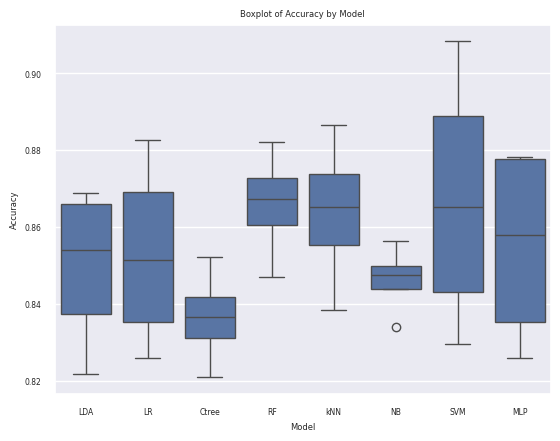

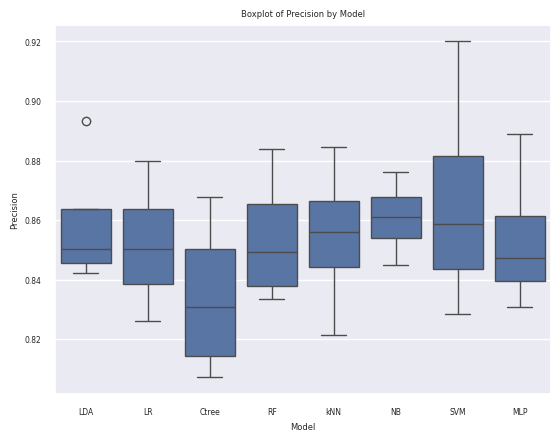

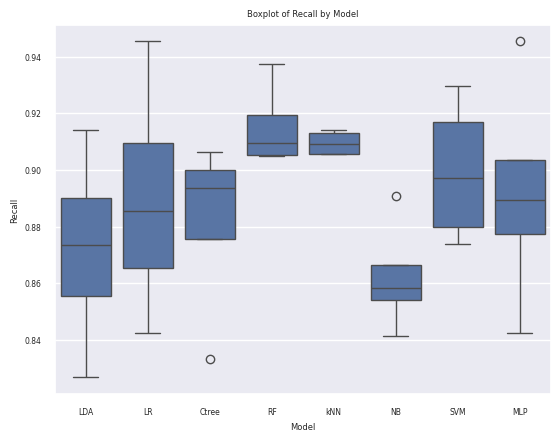

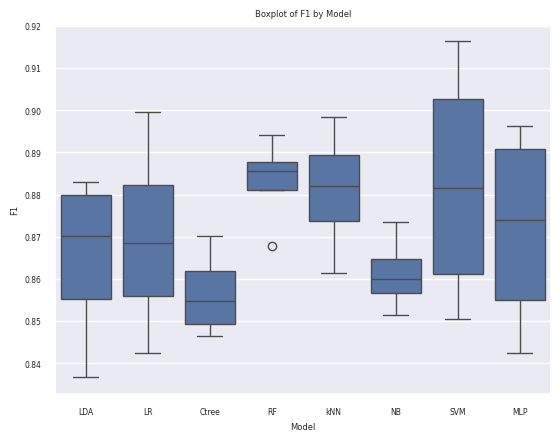

In [ ]:
# more boxplots

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for metric in metrics:
  sns.boxplot(x='Model', y=metric, data=test_set_df)
  plt.title(f"Boxplot of {metric} by Model")
  plt.ylabel(f'{metric}')
  plt.show()

In [ ]:
# ANOVA assumptions met (models follow a normal distribution and Levene's test show no differences in variances)
# lets proceed with ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Group ROC-AUC values by Model
anova_groups = [test_set_df[test_set_df['Model'] == model]['ROC-AUC'].values
                for model in test_set_df['Model'].unique()]

# One-way ANOVA
anova_result = stats.f_oneway(*anova_groups)
print("ANOVA Result:")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Check if the result is significant
if anova_result.pvalue <= 0.05:
    print("\nSignificant differences detected. Proceeding with post-hoc analysis...")

    # Tukey's HSD (Post-hoc test)
    tukey_result = pairwise_tukeyhsd(endog=test_set_df['ROC-AUC'],      # Dependent variable
                                     groups=test_set_df['Model'],  # Grouping variable
                                     alpha=0.05)                   # Significance level
    print(tukey_result)

    # Plot the Tukey results
    tukey_result.plot_simultaneous( figsize=(8, 6))
    plt.title("Tukey HSD Post-hoc Test Results")
    plt.show()
else:
    print("\nNo significant differences detected between models.")

ANOVA Result:
F-statistic: 0.9267813705692034, p-value: 0.50387820352193

No significant differences detected between models.
